# Final Project: Consumer Insights for Beats by Dre

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Student Name:** Amrapali Samnanta
**Date:** 10/17/2024

## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## 3. Introduction

### 3.1 Project Overview
This project aims to analyze customer reviews of the newly launched Beats Pill Bluetooth speaker compared to similar products on Amazon. By using sentiment analysis, feature extraction, and detailed data visualization, the project seeks to understand how the Beats Pill is perceived in terms of sound quality, portability, bass performance, and overall user satisfaction.

The key objectives include:

- Sentiment Analysis: Identifying and categorizing customer sentiments toward Beats and other competing speakers.
- Feature-Based Comparison: Analyzing review content to understand user feedback on specific features like sound quality and portability.
- Trend and Correlation Insights: Assessing how product ratings, sentiment, and specific attributes correlate over time.
- In-Depth Analysis: Comparing verified vs. unverified purchases, review length and helpfulness, and identifying trends in customer feedback over time.

**Products under Analysis:**


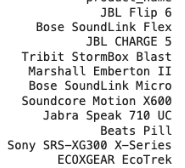

### 3.2 Background
In this project we are going to do competitive analysis of Beats Pill vs Other bluetooth soeakers in the market by analyzing reviews left by customers in Amazon

## 4. Data Description

### 4.1 Data Sources
Data sourced from Amazon using OxyLabs to scrape the reviews for Beats Pill and competitive products.

### Imports

In [ ]:
import os

import google.generativeai as genai

import numpy as np
import pandas as pd

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools

# Statistical tests
import statsmodels.api as sm
import scipy
from scipy import stats
from scipy.stats import norm, skew
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


# Set display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all columns
# pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)  # Prevent line breaks for wide DataFrames


from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
pip install textblob vaderSentiment nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.0 MB/s eta 0:00:00


In [ ]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import matplotlib.pyplot as plt

# Automatically save every figure when it's created
def save_figure(fig):
    filename = f"figure_{fig.number}.png"  # Use figure number for unique filenames
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Saved: {filename}")

# Connect the function to the 'savefig' event of the figure manager
plt.rcParams['savefig.dpi'] = 300  # Optional: set default resolution for saving
plt.rc('figure', autolayout=True)

# Hook into the figure lifecycle by connecting to 'close_event' to save every figure automatically
def save_all_figs(event):
    save_figure(event.canvas.figure)

# Register the save function to be called every time a figure is closed
plt.figure().canvas.mpl_connect('close_event', save_all_figs)


11

### 4.2 Data Collection



We extract data of different products from Amazon reviews using API tool Oxylabs(https://oxylabs.io/products/scraper-api/ecommerce/amazon/reviews) and then transform each extracted JSON files to dataframe and then to csv files.

Every file is then merged to get all reviews in one file called merged_reviews.

Below is an example for one Json file 'data4' which is saved as csv file 'reviews_4'

Note: We have a restriction of getting only 100 reviews processed while scraping through this tool. Hence, small number of data under analysis. We get 100 reviews each of all 10 products except Beats as it had 92.

**Note: No need to run these if the final dataset is already there as simply running the below cells gives error.**

In [ ]:
file_path = '/content/drive/MyDrive/Extern /Data Gathering/data4.json'
with open(file_path, 'r') as file:
    data = json.load(file)

In [ ]:
reviews_data = []
count = 0
for result in data['results']:
  asin = result['content']["asin"]
  for review in result['content']['reviews']:
    count += 1
    try:
      review_info = {
      'review_id': review['id'],
      'product_id': asin,
      "title": review["title"],
      "author": review["author"],
      "rating": review["rating"],
      "content": review["content"],
      "timestamp": review["timestamp"],
      "profile_id": review["profile_id"],
      "is_verified": review["is_verified"],
      "helpful_count": review.get('helpful_count', 0),
      "product_attributes": review["product_attributes"]
      }
      reviews_data.append(review_info)
    except:
      print(count)
      break

reviews_df = pd.DataFrame(reviews_data)

file_path = '/content/drive/MyDrive/Extern /Data Gathering/reviews_4.csv'
reviews_df.to_csv(file_path, index=False)
reviews_df

In [ ]:
# Correct folder path (removed extra space)
folder_path = '/content/drive/MyDrive/Extern /Data Gathering/'

# Initialize an empty dictionary to store the DataFrames
dfs = {}

# Loop through numbers 1 to 11 to load each file into a DataFrame
for i in range(1, 12):
    file_path = folder_path + f'reviews_{i}.csv'  # Generate the file path dynamically
    try:
        dfs[f'df_{i}'] = pd.read_csv(file_path)   # Read the CSV file and store it in the dictionary
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Access each DataFrame by its key
df_1 = dfs['df_1']
df_2 = dfs['df_2']
df_3 = dfs['df_3']
df_4 = dfs['df_4']
df_5 = dfs['df_5']
df_6 = dfs['df_6']
df_7 = dfs['df_7']
df_8 = dfs['df_8']
df_9 = dfs['df_9']
df_10 = dfs['df_10']
df_11 = dfs['df_11']

In [ ]:
merged_df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11], ignore_index=True)
merged_df

Final dataframe after merging all scraped reviews are put in csv file called merged_reviews

In [ ]:
file_path = '/content/drive/MyDrive/Extern /Data Gathering/merged_reviews.csv'
merged_df.to_csv(file_path, index=False)
merged_df


### 4.3 Data Cleaning


The 'merged_reviews' dataset from above is being used to clean the data. We have a total of 1092 reviews of 11 products.

Post all the cleaning and tarnsformations we prepare the file 'updated_dataset' which will be used for further analysis.

#### Load merged dataset

In [ ]:
merged_reviews = pd.read_csv('/content/drive/MyDrive/Extern /Data Gathering/merged_reviews.csv')
merged_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           1092 non-null   object
 1   product_id          1092 non-null   object
 2   title               1092 non-null   object
 3   author              1092 non-null   object
 4   rating              1092 non-null   int64 
 5   content             1092 non-null   object
 6   timestamp           1092 non-null   object
 7   profile_id          1092 non-null   object
 8   is_verified         1092 non-null   bool  
 9   helpful_count       1092 non-null   int64 
 10  product_attributes  890 non-null    object
dtypes: bool(1), int64(2), object(8)
memory usage: 86.5+ KB


In [ ]:
merged_reviews.shape

(1092, 11)

#### Handling Nulls

In [ ]:
merged_reviews.isna().sum()

review_id               0
product_id              0
title                   0
author                  0
rating                  0
content                 0
timestamp               0
profile_id              0
is_verified             0
helpful_count           0
product_attributes    202
dtype: int64

We have 202 product attributes which are NaN

In [ ]:
na_product_attributes = merged_reviews[merged_reviews['product_attributes'].isna()]

# filtered DataFrame
na_product_attributes.head()
na_product_attributes['product_id'].unique()


array(['B071R7NGTD', 'B09PMYTJD2', 'B07PWYKWQJ'], dtype=object)

Above Product Id are the ones with NaN product attributes.
Both 'B09PMYTJD2', 'B07PWYKWQJ' doesn't have different attributes so it is okay as it's just one type of model and we can understand all reviews are for that. However the id 'B071R7NGTD' has 2 nulls for attribute column and it might be of different style, so we checked for one review id in the content and update accordingly, the other one is filled with mode of product_attributes.

In [ ]:
product_data = merged_reviews[merged_reviews['product_id'] == 'B071R7NGTD']
product_data.isna().sum()

review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    2
dtype: int64

In [ ]:
# Filter records where product_attributes is NaN and product_id is 'B071R7NGTD'
filtered_df = merged_reviews[(merged_reviews['product_attributes'].isna()) & (merged_reviews['product_id'] == 'B071R7NGTD')]

# Display the filtered records
filtered_df


review_id  product_id                                              title      author  rating                                            content                                    timestamp                    profile_id  is_verified  helpful_count product_attributes
875   REGY8K9ZJC3FU  B071R7NGTD  4.0 out of 5 stars We use this for Skype and W...     jdickey       4  We're using this on a Windows 7 computer in a ...   Reviewed in the United States June 1, 2013  AGK6J3FSE7OGA5FPSEQDS3RGLRGQ         True              3                NaN
881  R325ET4E2R1CPZ  B071R7NGTD  5.0 out of 5 stars Danger: May cause people to...  Erica Wolf       5  I work in a tech startup with a fairly liberal...  Reviewed in the United States June 21, 2013  AFPBSOBF2FKZAOQCFWTW7MUMDNGA         True              5                NaN

In [ ]:
# Calculate the mode of the product_attributes column for product_id 'B071R7NGTD'
product_attributes_mode = merged_reviews[merged_reviews['product_id'] == 'B071R7NGTD']['product_attributes'].mode()[0]
product_attributes_mode

'Size: UC OptimizedStyle: Speak 710'

In [ ]:
import pandas as pd

# Replace NaN with specific value for review_id 'R325ET4E2R1CPZ' and product_id 'B071R7NGTD'
merged_reviews.loc[(merged_reviews['product_id'] == 'B071R7NGTD') & (merged_reviews['review_id'] == 'R325ET4E2R1CPZ'), 'product_attributes'] = 'Size: UC OptimizedStyle: Speak 510'

# Calculate the mode of the product_attributes column for product_id 'B071R7NGTD'
product_attributes_mode = merged_reviews[merged_reviews['product_id'] == 'B071R7NGTD']['product_attributes'].mode()[0]

# Replace NaN with the mode for review_id 'REGY8K9ZJC3FU' and product_id 'B071R7NGTD'
merged_reviews.loc[(merged_reviews['product_id'] == 'B071R7NGTD') & (merged_reviews['review_id'] == 'REGY8K9ZJC3FU'), 'product_attributes'] = product_attributes_mode

# Check the updates
print(merged_reviews[(merged_reviews['product_id'] == 'B071R7NGTD') & merged_reviews['review_id'].isin(['R325ET4E2R1CPZ', 'REGY8K9ZJC3FU'])])


          review_id  product_id                                              title      author  rating                                            content                                    timestamp                    profile_id  is_verified  helpful_count                  product_attributes
875   REGY8K9ZJC3FU  B071R7NGTD  4.0 out of 5 stars We use this for Skype and W...     jdickey       4  We're using this on a Windows 7 computer in a ...   Reviewed in the United States June 1, 2013  AGK6J3FSE7OGA5FPSEQDS3RGLRGQ         True              3  Size: UC OptimizedStyle: Speak 710
881  R325ET4E2R1CPZ  B071R7NGTD  5.0 out of 5 stars Danger: May cause people to...  Erica Wolf       5  I work in a tech startup with a fairly liberal...  Reviewed in the United States June 21, 2013  AFPBSOBF2FKZAOQCFWTW7MUMDNGA         True              5  Size: UC OptimizedStyle: Speak 510


Now we will fill the other 200 null product attributes with appropriate values Black and Gray as they are of only one type.

---



In [ ]:

# Replace NaN with 'Color: Black' for product_id 'B09PMYTJD2'
merged_reviews.loc[(merged_reviews['product_id'] == 'B09PMYTJD2') & (merged_reviews['product_attributes'].isna()), 'product_attributes'] = 'Color: Black'

# Replace NaN with 'Color: Gray' for product_id 'B07PWYKWQJ'
merged_reviews.loc[(merged_reviews['product_id'] == 'B07PWYKWQJ') & (merged_reviews['product_attributes'].isna()), 'product_attributes'] = 'Color: Gray'

# Check if the replacements were made correctly
print(merged_reviews[(merged_reviews['product_id'].isin(['B09PMYTJD2', 'B07PWYKWQJ'])) & (merged_reviews['product_attributes'].isna())])


Empty DataFrame
Columns: [review_id, product_id, title, author, rating, content, timestamp, profile_id, is_verified, helpful_count, product_attributes]
Index: []


All cleaning of nulls is done

In [ ]:
na_product_attributes = merged_reviews[merged_reviews['product_attributes'].isna()]

# filtered DataFrame
na_product_attributes.head()
na_product_attributes['product_id'].unique()


array([], dtype=object)

In [ ]:
na_product_attributes

Empty DataFrame
Columns: [review_id, product_id, title, author, rating, content, timestamp, profile_id, is_verified, helpful_count, product_attributes]
Index: []

#### Duplicates

There are no duplicates found.

In [ ]:
# Identify duplicates
duplicates = merged_reviews.duplicated()

duplicates.sum()


0

#### Outliers

Not removing any particular outliers here as outlier for helpful count will actually help in future analysis to understand which product was heavily helpful.

In [ ]:
Q1 = merged_reviews['helpful_count'].quantile(0.25)
Q3 = merged_reviews['helpful_count'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = merged_reviews[(merged_reviews['helpful_count'] < lower_bound) | (merged_reviews['helpful_count'] > upper_bound)]
print(f"Number of outliers in helpful_count: {outliers.shape[0]}")


Number of outliers in helpful_count: 195


#### Add product names instead of ids

In [ ]:

# Dictionary mapping ASIN to Product Name
product_mapping = {
    'B0D4SX9RC6': 'Beats Pill',
    'B09GJVTRNZ': 'JBL Flip 6',
    'B08X4YMTPM': 'JBL CHARGE 5',
    'B0BWXM3RRK': 'Soundcore Motion X600',
    'B099TJGJ91': 'Bose SoundLink Flex',
    'B0B43Y8GHZ': 'Sony SRS-XG300 X-Series',
    'B0748N1BZD': 'Bose SoundLink Micro',
    'B09XXW54QG': 'Marshall Emberton II',
    'B071R7NGTD': 'Jabra Speak 710 UC',
    'B09PMYTJD2': 'Tribit StormBox Blast',
    'B07PWYKWQJ': 'ECOXGEAR EcoTrek'
}

# Replace ASIN with Product Name
merged_reviews['product_name'] = merged_reviews['product_id'].map(product_mapping)



In [ ]:
merged_reviews.head()

review_id  product_id                                              title           author  rating                                            content                                         timestamp                    profile_id  is_verified  helpful_count                                 product_attributes product_name
0   RJ3AF8BBR5LBU  B0D4SX9RC6  5.0 out of 5 stars Exactly what i was looking for  Amazon Customer       5  Sleek. Compact. Well built. Great sound. Water...  Reviewed in the United States September 14, 2024  AE3TKYWCZT6VGNWCUC33TD6X2NMA         True              0  Color: Champagne GoldStyle: PillPattern: Witho...   Beats Pill
1  R2SSSH04J4J264  B0D4SX9RC6  5.0 out of 5 stars Really nice portable speake...          Bruce C       5  Needed a new portable speaker for the home set...        Reviewed in the United States July 1, 2024  AFVM53KRAU5JC462ZZDBBKTESPGA         True             19  Color: Statement RedStyle: PillPattern: Withou...   Beats Pill
2   R935PCZ92UVGL  B0D4SX9RC6                      5.0 out of 5 stars Very Happy        B. Hinson       5  We bought this for a trip to the beach and it ...   Reviewed in the United States September 5, 2024  AFPN35SDBWBDQAGNSNQJQPQH5C2Q         True              0  Color: Champagne GoldStyle: PillPattern: Witho...   Beats Pill
3  R2EVRTXO9M1YF7  B0D4SX9RC6           4.0 out of 5 stars Is it the JBL killer?            Tommy       4  I bought this because it was on sale, and I al...       Reviewed in the United States July 23, 2024  AHAMVBSECCNUJMQV6A3BO3A3HNMA         True              6  Color: Matte BlackStyle: PillPattern: Without ...   Beats Pill
4   R4BQHA0TLLJNN  B0D4SX9RC6  5.0 out of 5 stars The best Speaker I have eve...             Leox       5  I really like the new Beats Pill 2024 speaker....       Reviewed in the United States July 11, 2024  AEUCX7EIPTMCFN4OJBZHL2OYSVKQ         True              9  Color: Champagne GoldStyle: PillPattern: Witho...   Beats Pill

#### Categorical column analysis

As of now, I am not doing any transformation of categorical to numerical columns. I feel like keeping different styles and clors might be helpful. In EDA part if we find this helpful I will do it then.

In [ ]:
# For product_id or product_name
product_freq = merged_reviews['product_name'].value_counts()
print(product_freq)

# For product_attributes
attributes_freq = merged_reviews['product_attributes'].value_counts(dropna=False)  # Include NaNs
print(attributes_freq)

# For is_verified
is_verified_freq = merged_reviews['is_verified'].value_counts()
print(is_verified_freq)


product_name
JBL Flip 6                 100
JBL CHARGE 5               100
Soundcore Motion X600      100
Bose SoundLink Flex        100
Sony SRS-XG300 X-Series    100
Bose SoundLink Micro       100
Marshall Emberton II       100
Jabra Speak 710 UC         100
Tribit StormBox Blast      100
ECOXGEAR EcoTrek           100
Beats Pill                  92
Name: count, dtype: int64
product_attributes
Color: Black                                                     313
Color: Gray                                                      104
Color: Black & BrassStyle: Emberton II                            65
Color: BlackStyle: SRSXG300/B                                     51
Color: Matte BlackStyle: PillPattern: Without AppleCare+          46
Color: Blue                                                       41
Color: Stone Blue                                                 33
Color: Champagne GoldStyle: PillPattern: Without AppleCare+       29
Color: BlackStyle: Flip 6                        

#### Extract Date and Time

In [ ]:
import pandas as pd
import re

# Function to extract the date from the timestamp column
def extract_date(timestamp):
    # Regular expression to capture the month, day, and year
    match = re.search(r'(\w+)\s(\d{1,2}),\s(\d{4})', timestamp)
    if match:
        # Extract the matched groups: month, day, year
        month, day, year = match.groups()
        # Create a new date string in 'YYYY-MM-DD' format
        return pd.to_datetime(f'{month} {day}, {year}')
    return None  # Return None if no match

# Apply the function to the timestamp column
merged_reviews['date_of_review'] = merged_reviews['timestamp'].apply(extract_date)

# Check the resulting dataframe
print(merged_reviews[['timestamp', 'date_of_review']].head())


                                          timestamp date_of_review
0  Reviewed in the United States September 14, 2024     2024-09-14
1        Reviewed in the United States July 1, 2024     2024-07-01
2   Reviewed in the United States September 5, 2024     2024-09-05
3       Reviewed in the United States July 23, 2024     2024-07-23
4       Reviewed in the United States July 11, 2024     2024-07-11


In [ ]:
# Extract year, month, and day from the date_of_review column
merged_reviews['review_year'] = merged_reviews['date_of_review'].dt.year
merged_reviews['review_month'] = merged_reviews['date_of_review'].dt.month
merged_reviews['review_day'] = merged_reviews['date_of_review'].dt.day

# To extract the month name instead of the number
merged_reviews['review_month_name'] = merged_reviews['date_of_review'].dt.strftime('%B')

# Check the updated dataframe
print(merged_reviews[['date_of_review', 'review_year', 'review_month', 'review_day', 'review_month_name']].head())


  date_of_review  review_year  review_month  review_day review_month_name
0     2024-09-14         2024             9          14         September
1     2024-07-01         2024             7           1              July
2     2024-09-05         2024             9           5         September
3     2024-07-23         2024             7          23              July
4     2024-07-11         2024             7          11              July


In [ ]:
merged_reviews.head(1)

review_id  product_id                                              title           author  rating                                            content                                         timestamp                    profile_id  is_verified  helpful_count                                 product_attributes product_name date_of_review  review_year  review_month  review_day review_month_name
0  RJ3AF8BBR5LBU  B0D4SX9RC6  5.0 out of 5 stars Exactly what i was looking for  Amazon Customer       5  Sleek. Compact. Well built. Great sound. Water...  Reviewed in the United States September 14, 2024  AE3TKYWCZT6VGNWCUC33TD6X2NMA         True              0  Color: Champagne GoldStyle: PillPattern: Witho...   Beats Pill     2024-09-14         2024             9          14         September

#### Extracting the actual title review

This part that starts after the phrase 'out of 5 stars' will help in further analysis.

In [ ]:
# Function to extract review title
def extract_review_title(title):
    # Find the index of the first occurrence of 'out of 5 stars'
    index = title.find('out of 5 stars')
    if index != -1:
        return title[index + len('out of 5 stars'):].strip()
    return title  # Return the original title if not found

# Apply the function to create the review_title column
merged_reviews['review_title'] = merged_reviews['title'].apply(extract_review_title)

# Check the updated dataframe
print(merged_reviews[['title', 'review_title']].head())


                                               title                                       review_title
0  5.0 out of 5 stars Exactly what i was looking for                     Exactly what i was looking for
1  5.0 out of 5 stars Really nice portable speake...  Really nice portable speaker for the price. So...
2                      5.0 out of 5 stars Very Happy                                         Very Happy
3           4.0 out of 5 stars Is it the JBL killer?                              Is it the JBL killer?
4  5.0 out of 5 stars The best Speaker I have eve...    The best Speaker I have ever bought in my life!


In [ ]:
merged_reviews.head(3)

review_id  product_id                                              title           author  rating                                            content                                         timestamp                    profile_id  is_verified  helpful_count                                 product_attributes product_name date_of_review  review_year  review_month  review_day review_month_name                                       review_title
0   RJ3AF8BBR5LBU  B0D4SX9RC6  5.0 out of 5 stars Exactly what i was looking for  Amazon Customer       5  Sleek. Compact. Well built. Great sound. Water...  Reviewed in the United States September 14, 2024  AE3TKYWCZT6VGNWCUC33TD6X2NMA         True              0  Color: Champagne GoldStyle: PillPattern: Witho...   Beats Pill     2024-09-14         2024             9          14         September                     Exactly what i was looking for
1  R2SSSH04J4J264  B0D4SX9RC6  5.0 out of 5 stars Really nice portable speake...          Bruce C       5  Needed a new portable speaker for the home set...        Reviewed in the United States July 1, 2024  AFVM53KRAU5JC462ZZDBBKTESPGA         True             19  Color: Statement RedStyle: PillPattern: Withou...   Beats Pill     2024-07-01         2024             7           1              July  Really nice portable speaker for the price. So...
2   R935PCZ92UVGL  B0D4SX9RC6                      5.0 out of 5 stars Very Happy        B. Hinson       5  We bought this for a trip to the beach and it ...   Reviewed in the United States September 5, 2024  AFPN35SDBWBDQAGNSNQJQPQH5C2Q         True              0  Color: Champagne GoldStyle: PillPattern: Witho...   Beats Pill     2024-09-05         2024             9           5         September                                         Very Happy

#### Product attributes column transformation

In [ ]:
import re
# Function to extract color and style with improved regex
def extract_attributes(attributes):
    # Adjusted regex patterns to allow for no space between attributes
    color_match = re.search(r'Color:\s*([A-Za-z\s&]+)', attributes)
    style_match = re.search(r'Style:\s*([A-Za-z\s/0-9-]+)', attributes)

    color = color_match.group(1).strip() if color_match else None
    style = style_match.group(1).strip() if style_match else None

    return pd.Series([color, style])

# Apply the function and create new columns
merged_reviews[['color', 'style']] = merged_reviews['product_attributes'].apply(extract_attributes)

# Check the updated DataFrame
print(merged_reviews[['product_attributes', 'color', 'style']])

                                     product_attributes                color        style
0     Color: Champagne GoldStyle: PillPattern: Witho...  Champagne GoldStyle  PillPattern
1     Color: Statement RedStyle: PillPattern: Withou...   Statement RedStyle  PillPattern
2     Color: Champagne GoldStyle: PillPattern: Witho...  Champagne GoldStyle  PillPattern
3     Color: Matte BlackStyle: PillPattern: Without ...     Matte BlackStyle  PillPattern
4     Color: Champagne GoldStyle: PillPattern: Witho...  Champagne GoldStyle  PillPattern
5     Color: Statement RedStyle: PillPattern: Withou...   Statement RedStyle  PillPattern
6     Color: Matte BlackStyle: PillPattern: Without ...     Matte BlackStyle  PillPattern
7     Color: Matte BlackStyle: PillPattern: Without ...     Matte BlackStyle  PillPattern
8     Color: Matte BlackStyle: PillPattern: Without ...     Matte BlackStyle  PillPattern
9     Color: Matte BlackStyle: PillPattern: Without ...     Matte BlackStyle  PillPattern
10    Colo

In [ ]:
merged_reviews

review_id  product_id                                              title                                             author  rating                                            content                                         timestamp                    profile_id  is_verified  helpful_count                                 product_attributes             product_name date_of_review  review_year  review_month  review_day review_month_name                                       review_title                color        style
0      RJ3AF8BBR5LBU  B0D4SX9RC6  5.0 out of 5 stars Exactly what i was looking for                                    Amazon Customer       5  Sleek. Compact. Well built. Great sound. Water...  Reviewed in the United States September 14, 2024  AE3TKYWCZT6VGNWCUC33TD6X2NMA         True              0  Color: Champagne GoldStyle: PillPattern: Witho...               Beats Pill     2024-09-14         2024             9          14         September                     Exactly what i was looking for  Champagne GoldStyle  PillPattern
1     R2SSSH04J4J264  B0D4SX9RC6  5.0 out of 5 stars Really nice portable speake...                                            Bruce C       5  Needed a new portable speaker for the home set...        Reviewed in the United States July 1, 2024  AFVM53KRAU5JC462ZZDBBKTESPGA         True             19  Color: Statement RedStyle: PillPattern: Withou...               Beats Pill     2024-07-01         2024             7           1              July  Really nice portable speaker for the price. So...   Statement RedStyle  PillPattern
2      R935PCZ92UVGL  B0D4SX9RC6                      5.0 out of 5 stars Very Happy                                          B. Hinson       5  We bought this for a trip to the beach and it ...   Reviewed in the United States September 5, 2024  AFPN35SDBWBDQAGNSNQJQPQH5C2Q         True              0  Color: Champagne GoldStyle: PillPattern: Witho...               Beats Pill     2024-09-05         2024             9           5         September                                         Very Happy  Champagne GoldStyle  PillPattern
3     R2EVRTXO9M1YF7  B0D4SX9RC6           4.0 out of 5 stars Is it the JBL killer?                                              Tommy       4  I bought this because it was on sale, and I al...       Reviewed in the United States July 23, 2024  AHAMVBSECCNUJMQV6A3BO3A3HNMA         True              6  Color: Matte BlackStyle: PillPattern: Without ...               Beats Pill     2024-07-23         2024             7          23              July                              Is it the JBL killer?     Matte BlackStyle  PillPattern
4      R4BQHA0TLLJNN  B0D4SX9RC6  5.0 out of 5 stars The best Speaker I have eve...                                               Leox       5  I really like the new Beats Pill 2024 speaker....       Reviewed in the United States July 11, 2024  AEUCX7EIPTMCFN4OJBZHL2OYSVKQ         True              9  Color: Champagne GoldStyle: PillPattern: Witho...               Beats Pill     2024-07-11         2024             7          11              July    The best Speaker I have ever bought in my life!  Champagne GoldStyle  PillPattern
5     R39X7USU3OX34C  B0D4SX9RC6                     5.0 out of 5 stars Really good                                             Justin       5  So I’m super picky about sound and have spent ...        Reviewed in the United States July 8, 2024  AFSZPNTTLYCLNP536L6VS6UMFTNQ         True              7  Color: Statement RedStyle: PillPattern: Withou...               Beats Pill     2024-07-08         2024             7           8              July                                        Really good   Statement RedStyle  PillPattern
6     R1BHCCLK5GZ5VZ  B0D4SX9RC6                      5.0 out of 5 stars Beats Pill                                   Gregory Stratman       5  I love the size, weight and quality of my Pill...      Reviewed in the United States August 2, 2024  AHCXUEC2FLLJ3S6F762OS

#### Add price column

In [ ]:
# Dictionary mapping Product IDs to selling prices as collected on Sept 18, 2024
product_prices = {
    "B0D4SX9RC6": 149.95,   # Beats Pill
    "B09GJVTRNZ": 129.95,   # JBL Flip 6
    "B08X4YMTPM": 179.95,   # JBL Charge 5
    "B0BWXM3RRK": 199.99,   # Soundcore Motion X600
    "B099TJGJ91": 149.00,   # Bose SoundLink Flex
    "B0B43Y8GHZ": 198.00,   # Sony SRS-XG300
    "B0748N1BZD": 119.00,   # Bose SoundLink Micro
    "B09XXW54QG": 115.99,   # Marshall Emberton II
    "B071R7NGTD": 162.99,   # Jabra Speak 710
    "B09PMYTJD2": 199.99,    # Tribit StormBox Blast
    "B07PWYKWQJ": 179.99,   # Ecoxgear Ecotrek

}


# Map the product prices to a new column 'selling_price'
merged_reviews['sell_price(in $)'] = merged_reviews['product_id'].map(product_prices)



In [ ]:
merged_reviews.head()

review_id  product_id                                              title           author  rating                                            content                                         timestamp                    profile_id  is_verified  helpful_count                                 product_attributes product_name date_of_review  review_year  review_month  review_day review_month_name                                       review_title                color        style  sell_price(in $)
0   RJ3AF8BBR5LBU  B0D4SX9RC6  5.0 out of 5 stars Exactly what i was looking for  Amazon Customer       5  Sleek. Compact. Well built. Great sound. Water...  Reviewed in the United States September 14, 2024  AE3TKYWCZT6VGNWCUC33TD6X2NMA         True              0  Color: Champagne GoldStyle: PillPattern: Witho...   Beats Pill     2024-09-14         2024             9          14         September                     Exactly what i was looking for  Champagne GoldStyle  PillPattern            149.95
1  R2SSSH04J4J264  B0D4SX9RC6  5.0 out of 5 stars Really nice portable speake...          Bruce C       5  Needed a new portable speaker for the home set...        Reviewed in the United States July 1, 2024  AFVM53KRAU5JC462ZZDBBKTESPGA         True             19  Color: Statement RedStyle: PillPattern: Withou...   Beats Pill     2024-07-01         2024             7           1              July  Really nice portable speaker for the price. So...   Statement RedStyle  PillPattern            149.95
2   R935PCZ92UVGL  B0D4SX9RC6                      5.0 out of 5 stars Very Happy        B. Hinson       5  We bought this for a trip to the beach and it ...   Reviewed in the United States September 5, 2024  AFPN35SDBWBDQAGNSNQJQPQH5C2Q         True              0  Color: Champagne GoldStyle: PillPattern: Witho...   Beats Pill     2024-09-05         2024             9           5         September                                         Very Happy  Champagne GoldStyle  PillPattern            149.95
3  R2EVRTXO9M1YF7  B0D4SX9RC6           4.0 out of 5 stars Is it the JBL killer?            Tommy       4  I bought this because it was on sale, and I al...       Reviewed in the United States July 23, 2024  AHAMVBSECCNUJMQV6A3BO3A3HNMA         True              6  Color: Matte BlackStyle: PillPattern: Without ...   Beats Pill     2024-07-23         2024             7          23              July                              Is it the JBL killer?     Matte BlackStyle  PillPattern            149.95
4   R4BQHA0TLLJNN  B0D4SX9RC6  5.0 out of 5 stars The best Speaker I have eve...             Leox       5  I really like the new Beats Pill 2024 speaker....       Reviewed in the United States July 11, 2024  AEUCX7EIPTMCFN4OJBZHL2OYSVKQ         True              9  Color: Champagne GoldStyle: PillPattern: Witho...   Beats Pill     2024-07-11         2024             7          11              July    The best Speaker I have ever bought in my life!  Champagne GoldStyle  PillPattern            149.95

#### Saving the cleaned and transformed dataframe to csv file

In [ ]:
# Save the updated dataset
file_path = '/content/drive/MyDrive/Extern /Data Gathering/updated_dataset.csv'
merged_reviews.to_csv(file_path, index=False)

#### Final dataset after Cleaning

In [ ]:
merged_reviews.head()

review_id  product_id                                              title           author  rating                                            content                                         timestamp                    profile_id  is_verified  helpful_count                                 product_attributes product_name date_of_review  review_year  review_month  review_day review_month_name                                       review_title                color        style  sell_price(in $)
0   RJ3AF8BBR5LBU  B0D4SX9RC6  5.0 out of 5 stars Exactly what i was looking for  Amazon Customer       5  Sleek. Compact. Well built. Great sound. Water...  Reviewed in the United States September 14, 2024  AE3TKYWCZT6VGNWCUC33TD6X2NMA         True              0  Color: Champagne GoldStyle: PillPattern: Witho...   Beats Pill     2024-09-14         2024             9          14         September                     Exactly what i was looking for  Champagne GoldStyle  PillPattern            149.95
1  R2SSSH04J4J264  B0D4SX9RC6  5.0 out of 5 stars Really nice portable speake...          Bruce C       5  Needed a new portable speaker for the home set...        Reviewed in the United States July 1, 2024  AFVM53KRAU5JC462ZZDBBKTESPGA         True             19  Color: Statement RedStyle: PillPattern: Withou...   Beats Pill     2024-07-01         2024             7           1              July  Really nice portable speaker for the price. So...   Statement RedStyle  PillPattern            149.95
2   R935PCZ92UVGL  B0D4SX9RC6                      5.0 out of 5 stars Very Happy        B. Hinson       5  We bought this for a trip to the beach and it ...   Reviewed in the United States September 5, 2024  AFPN35SDBWBDQAGNSNQJQPQH5C2Q         True              0  Color: Champagne GoldStyle: PillPattern: Witho...   Beats Pill     2024-09-05         2024             9           5         September                                         Very Happy  Champagne GoldStyle  PillPattern            149.95
3  R2EVRTXO9M1YF7  B0D4SX9RC6           4.0 out of 5 stars Is it the JBL killer?            Tommy       4  I bought this because it was on sale, and I al...       Reviewed in the United States July 23, 2024  AHAMVBSECCNUJMQV6A3BO3A3HNMA         True              6  Color: Matte BlackStyle: PillPattern: Without ...   Beats Pill     2024-07-23         2024             7          23              July                              Is it the JBL killer?     Matte BlackStyle  PillPattern            149.95
4   R4BQHA0TLLJNN  B0D4SX9RC6  5.0 out of 5 stars The best Speaker I have eve...             Leox       5  I really like the new Beats Pill 2024 speaker....       Reviewed in the United States July 11, 2024  AEUCX7EIPTMCFN4OJBZHL2OYSVKQ         True              9  Color: Champagne GoldStyle: PillPattern: Witho...   Beats Pill     2024-07-11         2024             7          11              July    The best Speaker I have ever bought in my life!  Champagne GoldStyle  PillPattern            149.95

## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview
Provide a summary of the dataset, including key statistics (mean, median, mode, standard deviation, etc.).


#### Load the cleansed dataset

In [ ]:
amazon_reviews = pd.read_csv('/content/drive/MyDrive/Extern /Data Gathering/updated_dataset.csv')

In [ ]:
amazon_reviews.head(2)

review_id  product_id                                              title           author  rating                                            content                                         timestamp                    profile_id  is_verified  helpful_count                                 product_attributes product_name date_of_review  review_year  review_month  review_day review_month_name                                       review_title                color        style  sell_price(in $)
0   RJ3AF8BBR5LBU  B0D4SX9RC6  5.0 out of 5 stars Exactly what i was looking for  Amazon Customer       5  Sleek. Compact. Well built. Great sound. Water...  Reviewed in the United States September 14, 2024  AE3TKYWCZT6VGNWCUC33TD6X2NMA         True              0  Color: Champagne GoldStyle: PillPattern: Witho...   Beats Pill     2024-09-14         2024             9          14         September                     Exactly what i was looking for  Champagne GoldStyle  PillPattern            149.95
1  R2SSSH04J4J264  B0D4SX9RC6  5.0 out of 5 stars Really nice portable speake...          Bruce C       5  Needed a new portable speaker for the home set...        Reviewed in the United States July 1, 2024  AFVM53KRAU5JC462ZZDBBKTESPGA         True             19  Color: Statement RedStyle: PillPattern: Withou...   Beats Pill     2024-07-01         2024             7           1              July  Really nice portable speaker for the price. So...   Statement RedStyle  PillPattern            149.95

From the summary statistics we get to know the below:

Summary:
- Rating:

Count: There are 1,092 reviews in total.
Mean (Average): The average rating is 4.67, indicating most ratings are quite high.
Standard Deviation (Std): A standard deviation of 0.72 suggests that most ratings are clustered around the average, with relatively low variance.
Min/Max: Ratings range from 1.0 to 5.0.
50% (Median): The median is 5.0, suggesting half of the reviews gave the product a perfect score.

- Helpful Count:

Mean: On average, reviews received 4.2 helpful votes, but this varies significantly.
Std: A high standard deviation of 30.12 indicates that while most reviews had few helpful votes, some had a lot.
Max: The most helpful review received 796 votes.

- Review Year:

Mean: The average review is from the year 2023, with most data coming from the current year (2024).
Min/Max: Reviews date back as far as 2013, but the majority are from more recent years.

- Review Month:

Mean: Most reviews occurred in the middle of the year, with the average month being July (7th month).
Min/Max: Reviews span all months, from January to December.

- Review Day:

Mean: Reviews tend to be posted around the 16th day of the month, on average.
Sell Price (in $):

Mean: The average selling price of the products is around $160.57.
Min/Max: Prices range from $115.99 to $199.99.
Std: A standard deviation of 31.42 suggests moderate variability in prices across products.

Key Insights:
Ratings are predominantly high (5.0), indicating that users generally have positive experiences.
Helpful Votes show wide variation, with a few reviews receiving significant attention.
Prices vary within a $115.99 - $199.99 range, with an average close to $160.
This descriptive statistics analysis offers a solid foundation for more detailed analysis, like correlating ratings and helpfulness with prices and product features, as well as time-based trends.

In [ ]:
amazon_reviews.describe()

rating  helpful_count  review_year  review_month   review_day  sell_price(in $)
count  1092.000000    1092.000000  1092.000000   1092.000000  1092.000000       1092.000000
mean      4.672161       4.205128  2023.508242      7.145604    15.953297        162.344689
std       0.719401      30.117765     1.236819      2.139037     9.031903         30.461941
min       1.000000       0.000000  2013.000000      1.000000     1.000000        115.990000
25%       5.000000       0.000000  2024.000000      6.000000     8.000000        129.950000
50%       5.000000       0.000000  2024.000000      8.000000    16.000000        162.990000
75%       5.000000       1.000000  2024.000000      8.000000    24.000000        198.000000
max       5.000000     796.000000  2024.000000     12.000000    31.000000        199.990000

### 5.2 Visualizations
Include relevant visualizations (histograms, box plots, scatter plots, etc.) and explain what each visualization reveals about the data.

#### Ratings Count and distribution

Let's see the frequency of ratings

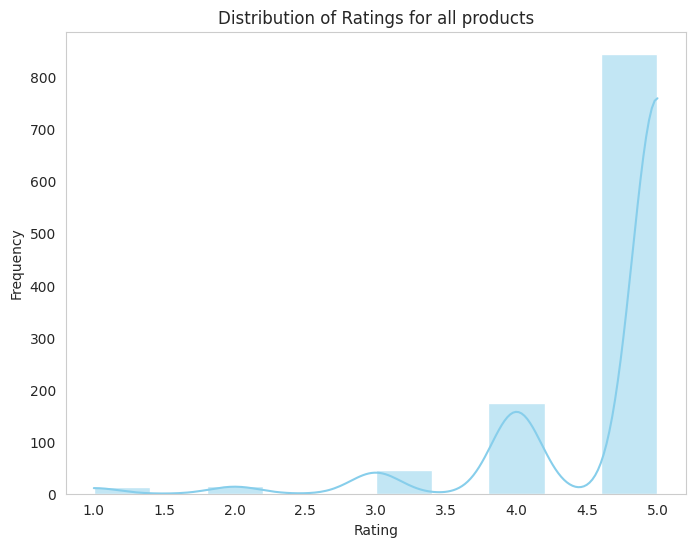

In [ ]:
# Histogram for 'rating'
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(8, 6))
sns.histplot(amazon_reviews['rating'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Ratings for all products')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



Seems like we have more of 5.0 ratings. Let's try to see what are the products who have highest 5.0 ratings and how many.

In [ ]:
# Filter for 5-star ratings
five_star_reviews = amazon_reviews[amazon_reviews['rating'] == 5.0]

# Count the number of 5-star ratings for each product
five_star_count_by_product = five_star_reviews.groupby('product_name').size().reset_index(name='five_star_count')

# Sort the products by the number of 5-star ratings in descending order
top_five_star_products = five_star_count_by_product.sort_values(by='five_star_count', ascending=False)

# Display the top products with the highest number of 5-star ratings
top_products = top_five_star_products.head(9)  # Display top 9 products
print(top_products)



             product_name  five_star_count
1     Bose SoundLink Flex               88
5              JBL Flip 6               88
4            JBL CHARGE 5               87
10  Tribit StormBox Blast               82
2    Bose SoundLink Micro               81
7    Marshall Emberton II               81
9   Soundcore Motion X600               76
6      Jabra Speak 710 UC               71
0              Beats Pill               70


- We know that for this project we collected about 100 reviews, so as per this count of 5 star ratings it seems that quite a good number of reviews have 5.0 ratings across all products except Ecoxgear which is lowest.
- I think the potential competitors of Beats would be the other 8 products on top of Beats which have atleast 70 or more 5 star ratings and Beats Pill being the lowest amongst them. But we should also be mindful that Beats Pill is a new market.

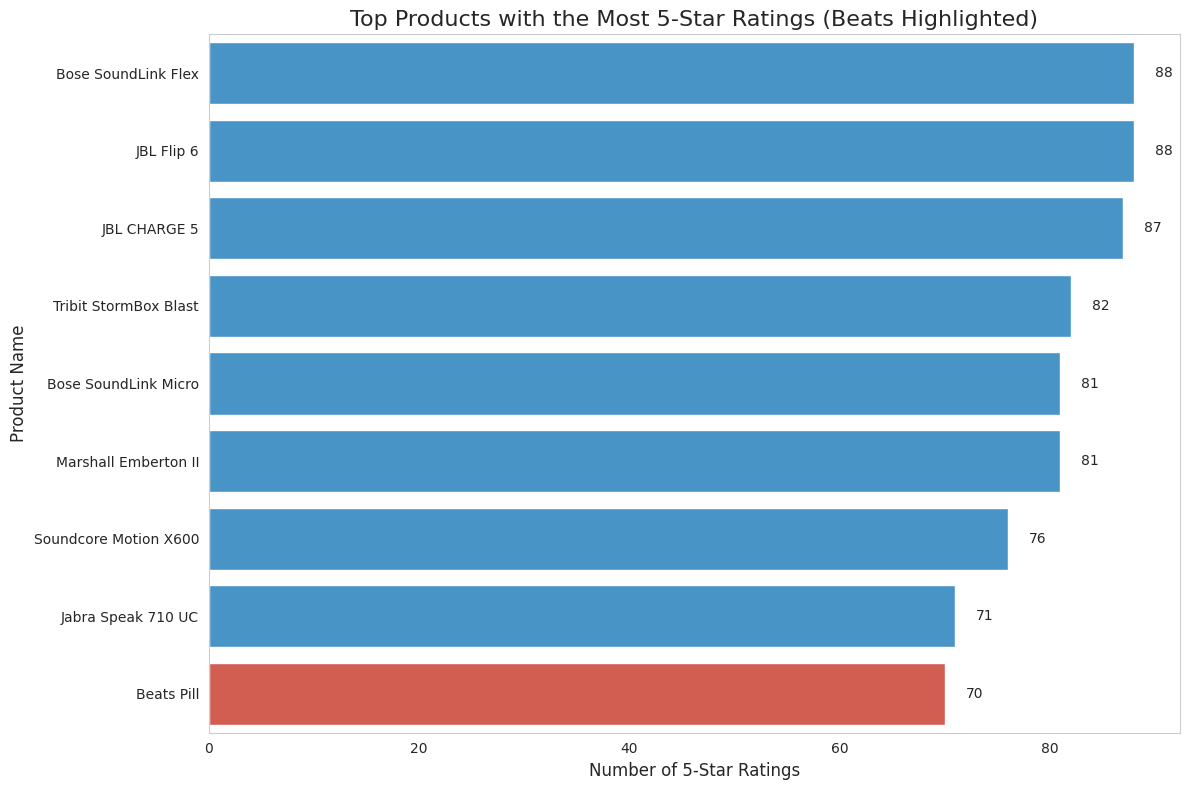

In [ ]:
# Sort products by number of 5-star ratings for a clearer order
top_products_sorted = top_products.sort_values('five_star_count', ascending=False)

# Define a custom color palette to highlight Beats
colors = ['#3498db' if product != 'Beats Pill' else '#e74c3c' for product in top_products_sorted['product_name']]

# Create the bar plot with value labels
plt.figure(figsize=(12, 8))
bars = sns.barplot(x='five_star_count', y='product_name', data=top_products_sorted, palette=colors)

# Add value labels on each bar
for index, value in enumerate(top_products_sorted['five_star_count']):
    plt.text(value + 2, index, str(value), va='center')  # Adjust position and padding

# Improve plot appearance
plt.title('Top Products with the Most 5-Star Ratings (Beats Highlighted)', fontsize=16)
plt.xlabel('Number of 5-Star Ratings', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Rotate or wrap product names for better readability if needed
plt.tight_layout()

# Show the plot
plt.show()


Insights:
* JBL Flip 6 and Bose SoundLink Flex lead with 88 reviews each.
* JBL CHARGE 5 follows closely with 87 reviews.
* Tribit StormBox Blast, Bose SoundLink Micro, and Marshall Emberton II have similar counts (82, 81, and 81, respectively).
* The Beats Pill ranks lower with 70 5-star reviews, while other competitors like Jabra Speak 710 UC, Sony SRS-XG300 X-Series, and ECOXGEAR EcoTrek also show significant numbers.

- Average rating:
Even by average rating the order doesn't vary much. By the average rating, Beats Pill is lower than many of it's competitors.

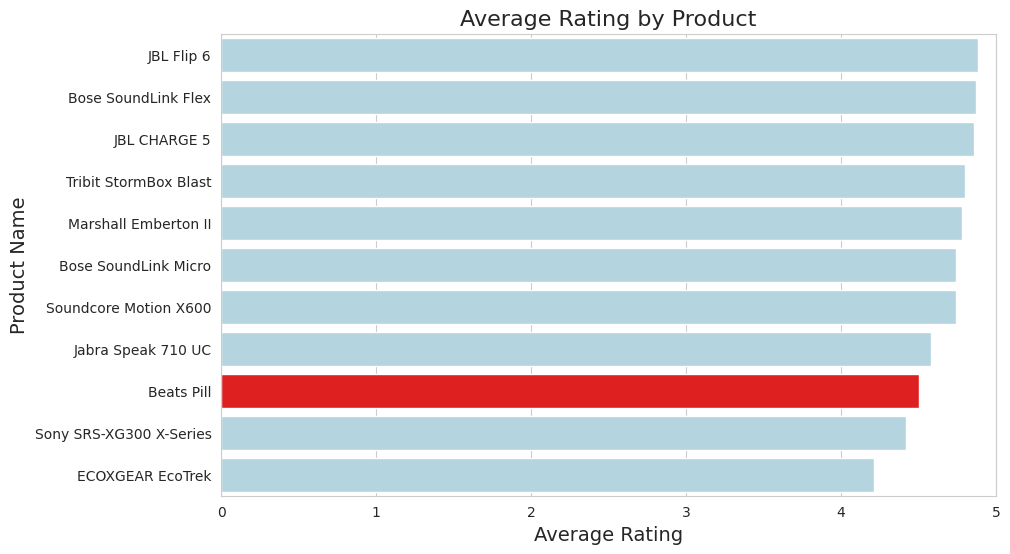

In [ ]:

# Calculate the average rating for each product
average_rating_by_product = amazon_reviews.groupby('product_name')['rating'].mean().reset_index(name='average_rating')

# Sort by average rating in descending order
top_average_ratings = average_rating_by_product.sort_values(by='average_rating', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))

# Loop through the sorted DataFrame to plot
colors = ['red' if product == 'Beats Pill' else 'lightblue' for product in top_average_ratings['product_name']]
bar_plot = sns.barplot(x='average_rating', y='product_name', data=top_average_ratings, palette=colors)

# Title and labels
plt.title('Average Rating by Product', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Product Name', fontsize=14)

# Set x-axis limits for ratings
plt.xlim(0, 5)
plt.grid(axis='x')  # Add grid for better readability


plt.show()




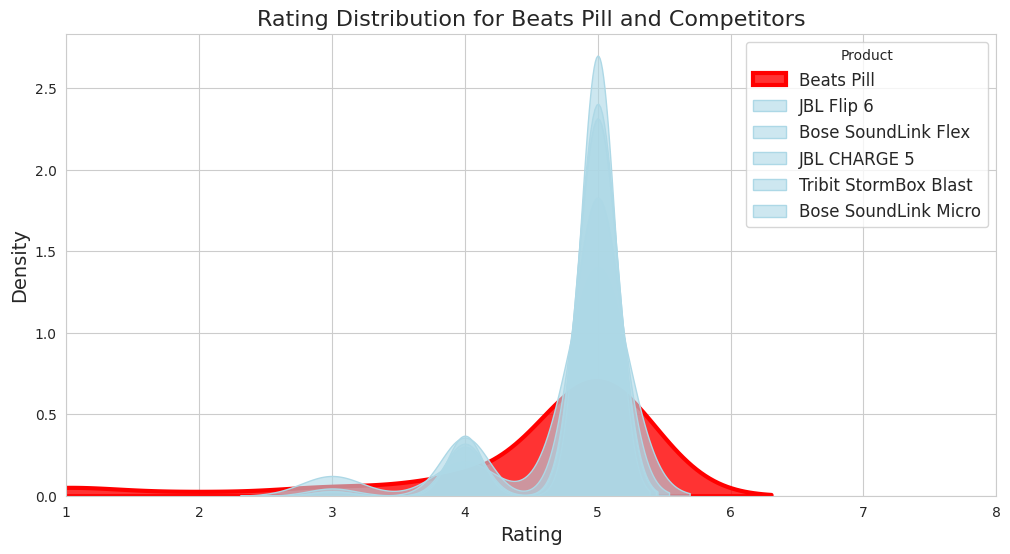

In [ ]:
# Plot rating distribution for Beats Pill and competitors(top 5)

# Define the competitor products
competitor_products = ['Beats Pill', 'JBL Flip 6', 'Bose SoundLink Flex', 'JBL CHARGE 5', 'Tribit StormBox Blast', 'Bose SoundLink Micro']

plt.figure(figsize=(12, 6))

# Loop through products and plot
for product in competitor_products:
    if product == 'Beats Pill':
        sns.kdeplot(
            amazon_reviews[amazon_reviews['product_name'] == product]['rating'],
            label=product,
            shade=True,
            color='red',  # Highlighting Beats Pill in red
            linewidth=3,  # Thicker line for Beats Pill
            alpha=0.8
        )
    else:
        sns.kdeplot(
            amazon_reviews[amazon_reviews['product_name'] == product]['rating'],
            label=product,
            shade=True,
            color='lightblue',  # Lighter color for competitors
            alpha=0.6
        )

# Title and labels
plt.title('Rating Distribution for Beats Pill and Competitors', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Product', fontsize=12)

plt.grid(True)  # Add grid for better readability
plt.xlim(1, 8)  # Set x-axis limits for ratings

plt.show()



We can see the beats pill has a distribution range of rating starting from 0 whereas other competitors has more better rating distribution concentrated from 2.5 to 5.5

#### Selling Price Distribution analysis

Distribution of Selling price of the products under analysis.

Beats price is $149 and this distribution shows the horizontal bars of the plot shows that the competitors under analysis are within +50 and -50 range of Beats Pill price.

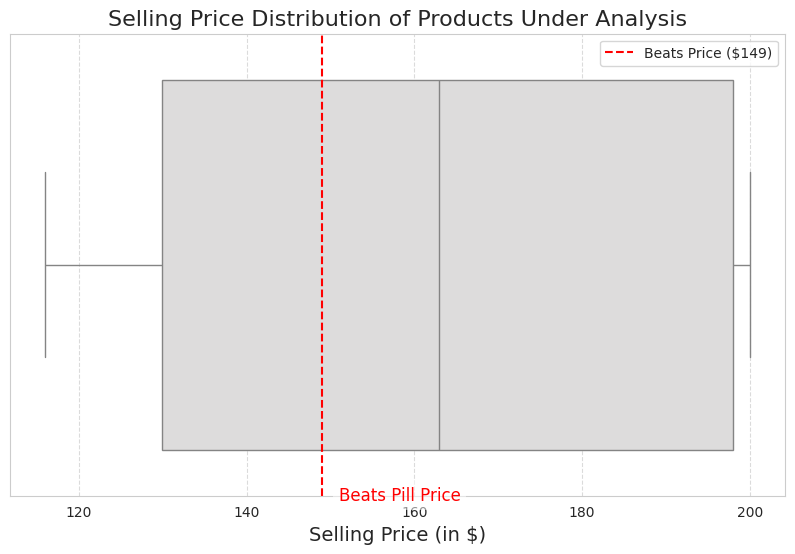

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot for 'sell_price(in $)'
plt.figure(figsize=(10, 6))
sns.boxplot(x='sell_price(in $)', data=amazon_reviews, palette='coolwarm')

# Title and labels
plt.title('Selling Price Distribution of Products Under Analysis', fontsize=16)
plt.xlabel('Selling Price (in $)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability

# Highlighting the Beats price
beats_price = 149
plt.axvline(beats_price, color='red', linestyle='--', label='Beats Price ($149)')  # Add a vertical line for Beats price

# Adding an annotation for Beats price
plt.text(beats_price + 2, 0.5, 'Beats Pill Price', color='red', fontsize=12,
         verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Show the legend
plt.legend()

plt.show()


#### Analysis for reviews if 'Is_verified'

This column can help us understand if there's a difference in review patterns between verified and non-verified customers who purchased all the products under analysis.

Insight: It's good to know the our data mostly has True verified customers

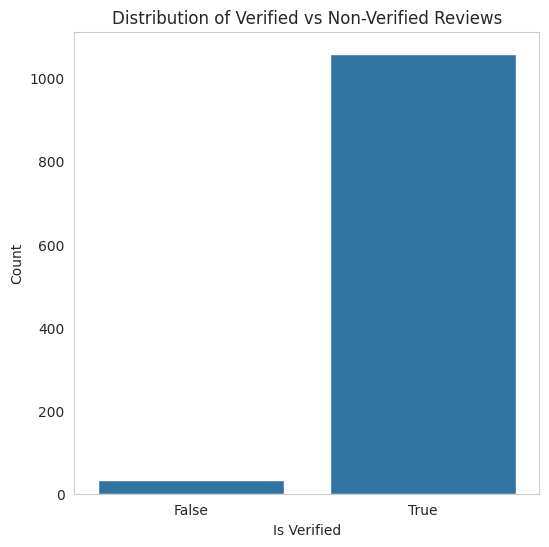

is_verified
True     1059
False      33
Name: count, dtype: int64


In [ ]:
# Count of verified vs non-verified reviews
verified_counts = amazon_reviews['is_verified'].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 6))
sns.barplot(x=verified_counts.index, y=verified_counts.values)
plt.title('Distribution of Verified vs Non-Verified Reviews')
plt.xlabel('Is Verified')
plt.ylabel('Count')
plt.show()

# Display the actual count
print(verified_counts)


Insight: An interesting outcome we see is taht with time verified count increased and hence we can be sure that reviews we got are from true sources.

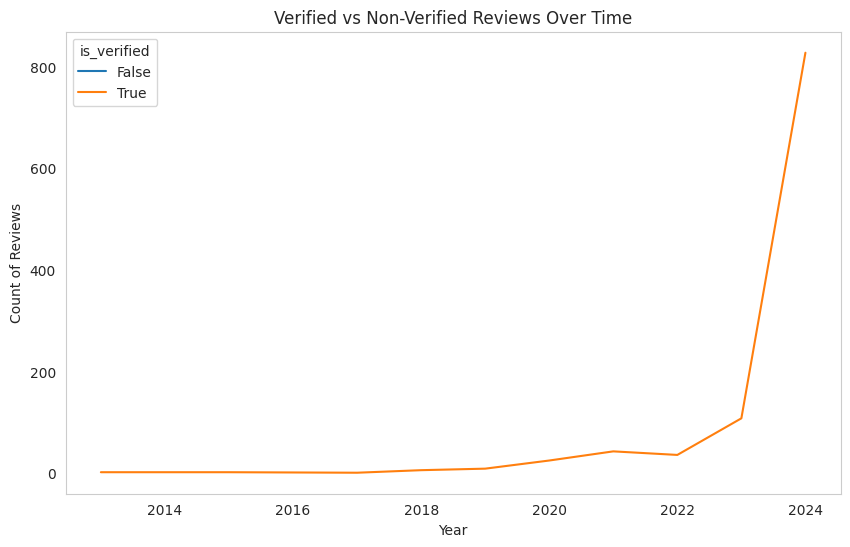

In [ ]:
# Group by year and verification status
verified_time_trends = amazon_reviews.groupby(['review_year', 'is_verified']).size().unstack()

# Plot the trends over time
verified_time_trends.plot(kind='line', figsize=(10, 6))
plt.title('Verified vs Non-Verified Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Count of Reviews')
plt.show()


#### Ratings vs Helpful Count

Insight: More the ratings more the helpful count which is good.

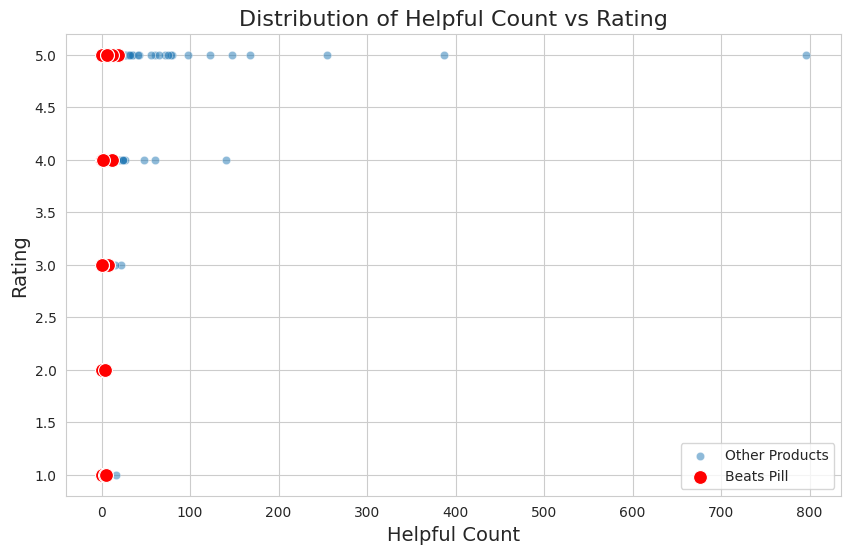

In [ ]:
# Filter data for Beats Pill
beats_reviews = amazon_reviews[amazon_reviews['product_name'] == 'Beats Pill']

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='helpful_count', y='rating', data=amazon_reviews, alpha=0.5, label='Other Products')  # Plot all other products
sns.scatterplot(x='helpful_count', y='rating', data=beats_reviews, color='red', s=100, label='Beats Pill')  # Highlight Beats Pill

# Title and labels
plt.title('Distribution of Helpful Count vs Rating', fontsize=16)
plt.xlabel('Helpful Count', fontsize=14)
plt.ylabel('Rating', fontsize=14)

# Add a legend
plt.legend()

plt.grid(True)  # Add grid for better readability
plt.show()


#### Month wise distribution of number of reviews

Insight: August has seen the most number of reviews posted followed by July and then Sept. Beats can focus on marketing strategy during those months.

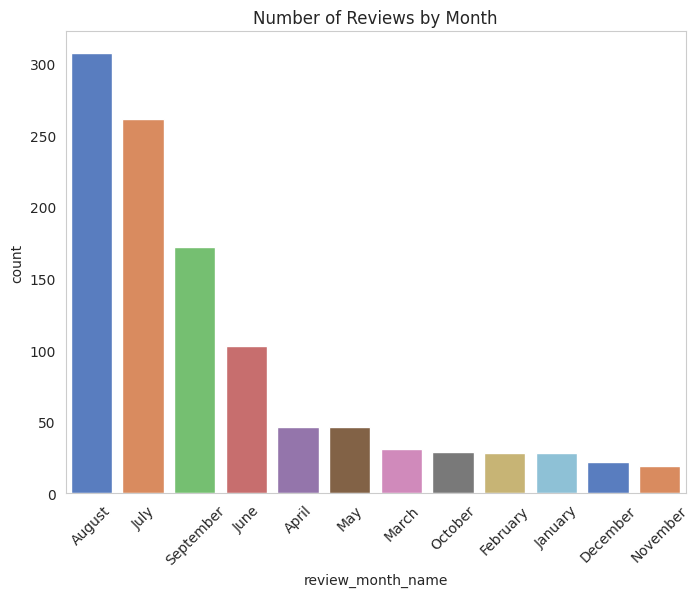

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='review_month_name', data=amazon_reviews, order=amazon_reviews['review_month_name'].value_counts().index, palette='muted')
plt.title('Number of Reviews by Month')
plt.xticks(rotation=45)
plt.show()


#### Helpful count per year

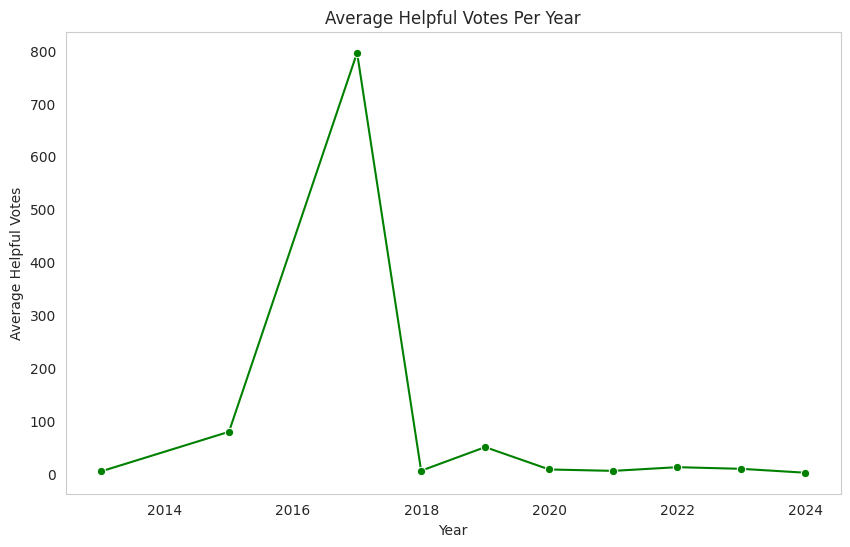

In [ ]:
# Helpful count per year
helpful_per_year = amazon_reviews.groupby('review_year')['helpful_count'].mean()

# Plot helpful votes over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=helpful_per_year.index, y=helpful_per_year.values, marker='o', color='green')
plt.title('Average Helpful Votes Per Year')
plt.xlabel('Year')
plt.ylabel('Average Helpful Votes')
plt.show()


As we saw average ratings were more on 2017 hence more helpful count during that time makes sense.

#### Beats Pill reviews over time

Year-month for beats
It allows us to group and analyze the data based on both the year and the month together. This is particularly useful for time series analysis, as it helps in visualizing trends and patterns over a more granular time frame.

Beats Pill was first available from June 2024

Insight: We get an idea that with time no of reviews fell. There could be two reasons, either people stopped buying or people who bought earlier post launch gave reviews.

Note: To run this cell, if you get a year-month error, please rerun.

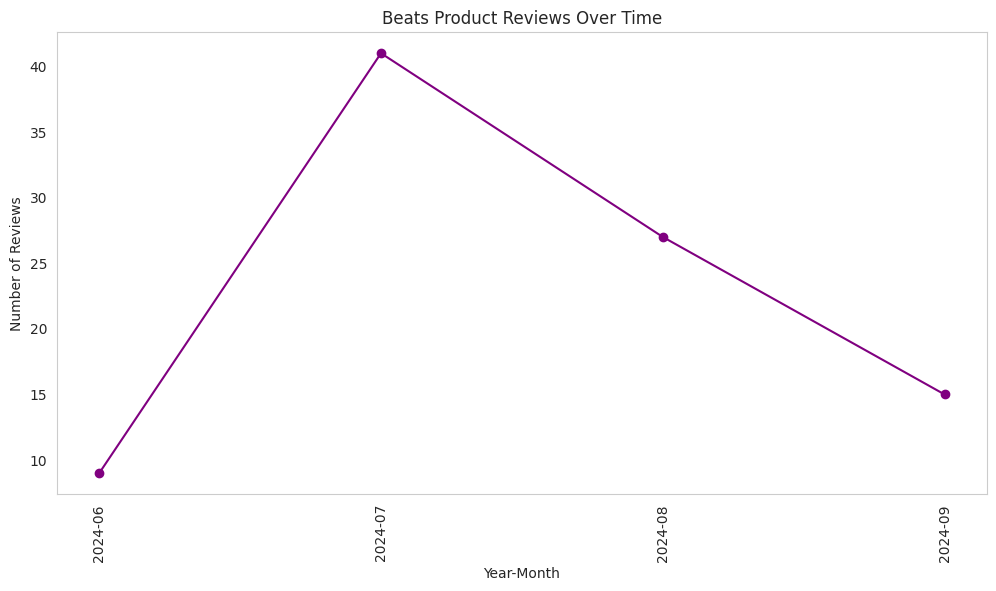

In [ ]:
# Filter for Beats products
beats_reviews = amazon_reviews[amazon_reviews['product_name'].str.contains('Beats', case=False)]


# Create a composite year_month column
amazon_reviews['year_month'] = amazon_reviews['review_year'].astype(str) + '-' + amazon_reviews['review_month'].astype(str).str.zfill(2)

# Group by year-month and count the number of reviews
beats_reviews_per_year_month = beats_reviews.groupby('year_month').size()

# Plot reviews for Beats over time
plt.figure(figsize=(12, 6))
beats_reviews_per_year_month.plot(kind='line', marker='o', color='purple')
plt.title('Beats Product Reviews Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()


- Average Number of Reviews by Month for Beats Pill

  Insight:  The average number of reviews for Beats is 23 and July had most number of reviews probably because it was just launched in June. However, the growth of reviews is not increasing but decreased in August and September.

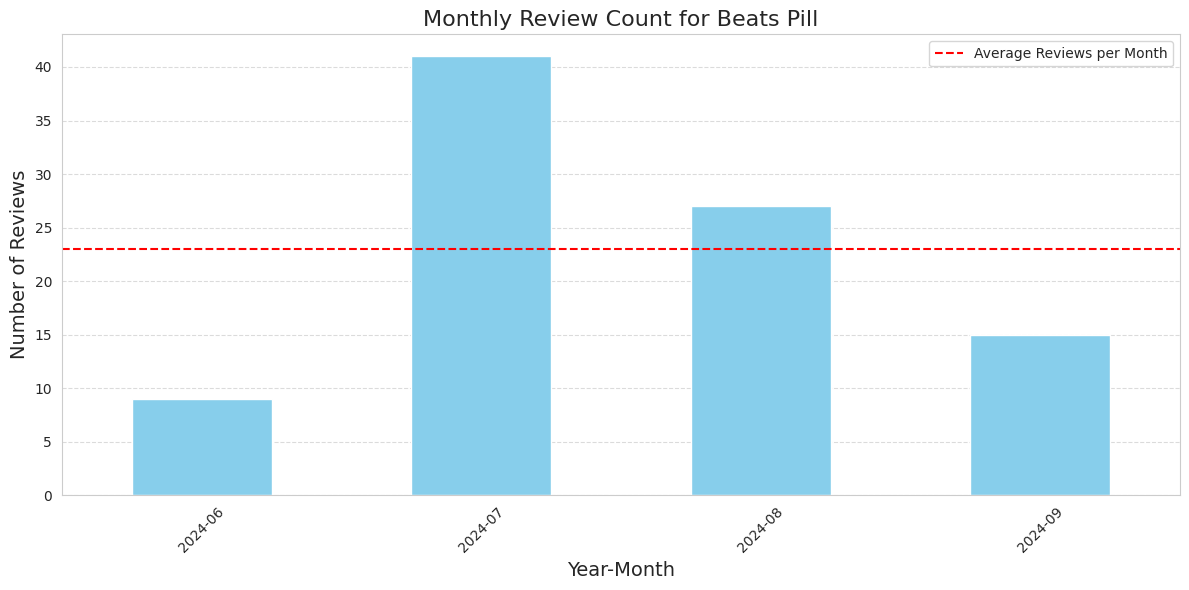

In [ ]:
# Assuming amazon_reviews is your DataFrame containing the data
# Filter for Beats Pill
beats_reviews = amazon_reviews[amazon_reviews['product_name'] == 'Beats Pill']

# Group by year_month and count reviews
monthly_review_counts = beats_reviews.groupby('year_month').size()

# Calculate the average number of reviews per month (if applicable)
average_reviews_per_month = monthly_review_counts.mean()

# Plotting
plt.figure(figsize=(12, 6))

# Create a bar chart for monthly review counts
monthly_review_counts.plot(kind='bar', color='skyblue')

plt.title('Monthly Review Count for Beats Pill', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show average line (if applicable)
plt.axhline(y=average_reviews_per_month, color='red', linestyle='--', label='Average Reviews per Month')
plt.legend()

plt.tight_layout()
plt.show()


#### Number of reviews from June 2024 onwards for Beats Pill vs other competitors

Insight: From this trend we understand that clear winners in long run of about 3.5 months in competition to Beats are Bose soundlink Flex  and the JBL Charge 5 and JBL Flip 6 which are continuing to have upward trend in number of reviews than Beats. Beats is doing better than all other brands. Beats has been getting highest number of reviews post launch month i.e. July

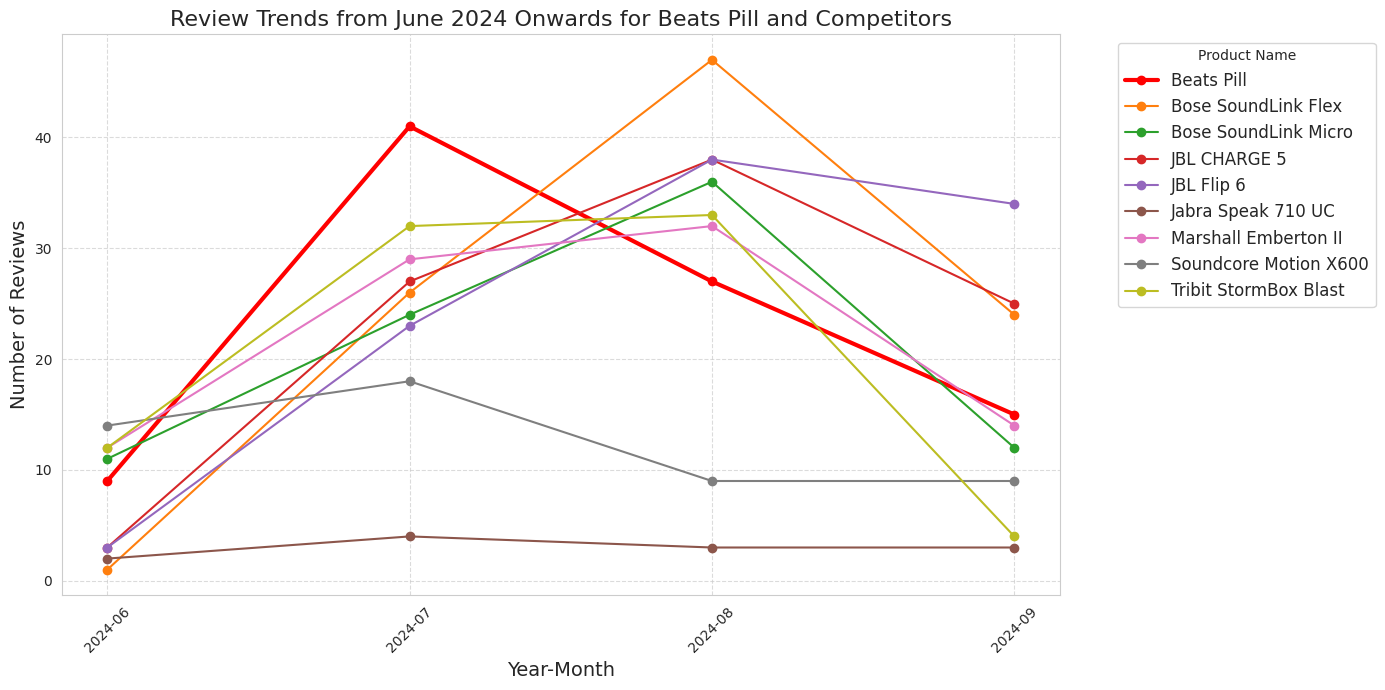

In [ ]:
# Define the selected products
selected_products = ['Beats Pill', 'JBL Flip 6', 'Bose SoundLink Flex', 'JBL CHARGE 5', 'Tribit StormBox Blast',
                     'Bose SoundLink Micro','Marshall Emberton II', 'Soundcore Motion X600','Jabra Speak 710 UC']

# Filter reviews for these products
filtered_reviews = amazon_reviews[amazon_reviews['product_name'].isin(selected_products)]

# Filter reviews for JBL, Bose, Beats, and Tribit from June 2024 onwards
brands = ['JBL', 'Bose', 'Beats', 'Tribit', 'Marshall', 'Soundcore', 'Jabra']
filtered_reviews = amazon_reviews[
    (amazon_reviews['year_month'] >= '2024-06') &
    (amazon_reviews['product_name'].str.contains('|'.join(brands), case=False))
]

# Group by year_month and product_name to count reviews
review_trends = filtered_reviews.groupby(['year_month', 'product_name']).size().unstack(fill_value=0)

# Plot the trends
plt.figure(figsize=(14, 7))

# Using a color palette
colors = plt.cm.tab10.colors  # You can choose any colormap
for i, product in enumerate(review_trends.columns):
    if product == 'Beats Pill':  # Highlight Beats
        plt.plot(review_trends.index, review_trends[product], marker='o', linestyle='-', linewidth=3,
                 color='red', label=product)  # Make Beats line thicker and red
    else:
        plt.plot(review_trends.index, review_trends[product], marker='o', linestyle='-',
                 color=colors[i % len(colors)], label=product)

plt.title('Review Trends from June 2024 Onwards for Beats Pill and Competitors', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


### 5.3 Descriptive Statistics
Discuss key findings from the descriptive statistics, highlighting any patterns, trends, or anomalies.

Interpretation:
The data is heavily skewed towards positive ratings, with very few low ratings.
Most reviews are concentrated in 2024, and the helpful count has extreme outliers.
The price distribution is fairly normal, without significant variation or outliers.

In [ ]:

# Select only numeric columns from the dataset
numeric_columns = amazon_reviews.select_dtypes(include=['float64', 'int64']).columns
numeric_data = amazon_reviews[numeric_columns]

# Now you can apply descriptive statistics to the numeric data
descriptive_stats = numeric_data.describe()

# Basic descriptive statistics
summary_stats = numeric_data.describe()

# Add skewness and kurtosis
summary_stats.loc['skewness'] = numeric_data.skew()
summary_stats.loc['kurtosis'] = numeric_data.kurt()

# Print or save the descriptive stats
print(summary_stats)



               rating  helpful_count  review_year  review_month   review_day  sell_price(in $)  sound_sentiment  battery_sentiment  portable_sentiment  sentiment_score  review_length
count     1092.000000    1092.000000  1092.000000   1092.000000  1092.000000       1092.000000       747.000000         272.000000          109.000000      1092.000000    1092.000000
mean         4.672161       4.205128  2023.508242      7.145604    15.953297        162.344689         0.765259           0.797779            0.808205         0.682571      93.421245
std          0.719401      30.117765     1.236819      2.139037     9.031903         30.461941         0.358606           0.367516            0.350029         0.405850     150.064246
min          1.000000       0.000000  2013.000000      1.000000     1.000000        115.990000        -0.979800          -0.979800           -0.700300        -0.979800       1.000000
25%          5.000000       0.000000  2024.000000      6.000000     8.000000        1

## 6. Sentiment Analysis

### 6.1 Methodology
Below we explain the sentiment analysis techniques used (e.g., TextBlob, NLTK)

1. TextBlob
TextBlob is a simple library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks.

Key Features:
Sentiment Analysis: TextBlob can assess the sentiment of a text by returning two values:
Polarity: A float within the range of [-1.0, 1.0] that indicates sentiment strength. A negative value indicates negative sentiment, while a positive value indicates positive sentiment.
Subjectivity: A float within the range of [0.0, 1.0] that indicates how subjective the text is. A value closer to 0 indicates objective statements, while a value closer to 1 indicates subjective opinions.

2. NLTK (Natural Language Toolkit)
NLTK is a more comprehensive library used for working with human language data (text). It offers various tools and resources for tasks like classification, tokenization, stemming, tagging, parsing, and sentiment analysis.

Key Features:
Sentiment Analysis: NLTK provides pre-trained sentiment analysis models, like VADER (Valence Aware Dictionary and sEntiment Reasoner), specifically designed for social media and short text.
Lexicons: You can use various lexicons, including SentiWordNet, to derive sentiment scores based on word associations.

  Objective:
- Perform sentiment analysis on the text reviews.
- Classify the reviews into positive, negative, and neutral sentiments.
- Aggregate the sentiment scores to assess overall consumer sentiment.

#### Using Textblob

In [ ]:
def get_sentiment_textblob(text):
    # TextBlob gives a polarity score between -1 and 1
    # Negative = Negative sentiment, Positive = Positive sentiment, 0 = Neutral
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'


#### Using Vader

In [ ]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_vader(text):
    # VADER returns scores for positive, negative, neutral, and compound
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']

    # Classify based on compound score
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'


Insight: Applying both the types of analysis we see more of positive reviews.

#### Sentiment Analysis and Scores

In [ ]:
# Apply sentiment analysis using TextBlob
amazon_reviews['sentiment_textblob'] = amazon_reviews['content'].apply(get_sentiment_textblob)

# Apply sentiment analysis using VADER
amazon_reviews['sentiment_vader'] = amazon_reviews['content'].apply(get_sentiment_vader)

# Aggregate sentiment counts (TextBlob)
textblob_sentiment_counts = amazon_reviews['sentiment_textblob'].value_counts()

# Aggregate sentiment counts (VADER)
vader_sentiment_counts = amazon_reviews['sentiment_vader'].value_counts()

# Print aggregated counts
print("TextBlob Sentiment Counts:")
print(textblob_sentiment_counts)
print("\nVADER Sentiment Counts:")
print(vader_sentiment_counts)


TextBlob Sentiment Counts:
sentiment_textblob
positive    987
neutral      72
negative     33
Name: count, dtype: int64

VADER Sentiment Counts:
sentiment_vader
positive    958
negative     67
neutral      67
Name: count, dtype: int64


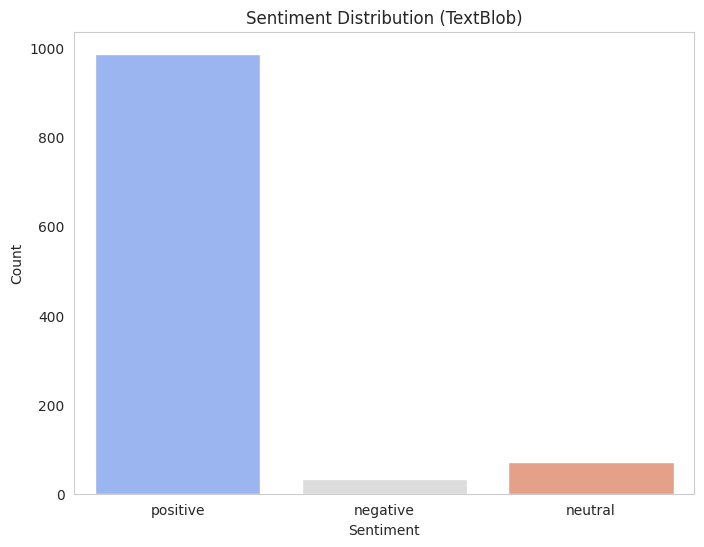

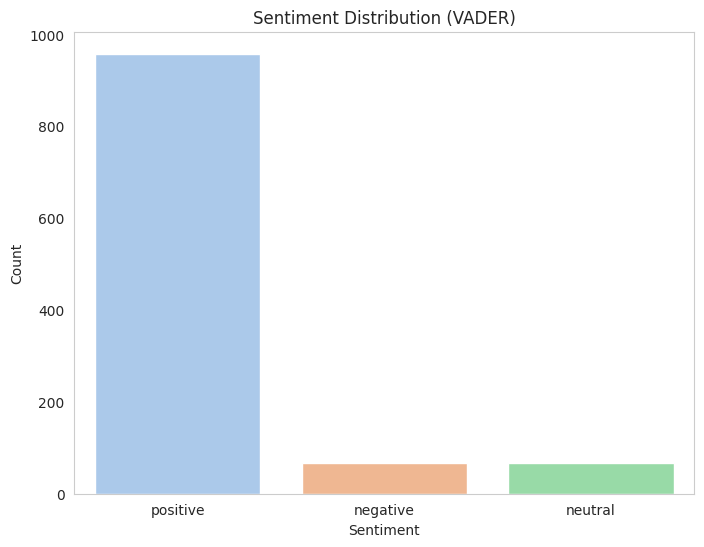

In [ ]:
# TextBlob Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_textblob', data=amazon_reviews, palette='coolwarm')
plt.title('Sentiment Distribution (TextBlob)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#  VADER Sentiment Distribution:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_vader', data=amazon_reviews, palette='pastel')
plt.title('Sentiment Distribution (VADER)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
# TextBlob sentiment percentages
textblob_sentiment_percent = (amazon_reviews['sentiment_textblob'].value_counts(normalize=True) * 100).round(2)

# VADER sentiment percentages
vader_sentiment_percent = (amazon_reviews['sentiment_vader'].value_counts(normalize=True) * 100).round(2)

print("Overall Consumer Sentiment (TextBlob):")
print(textblob_sentiment_percent)

print("\nOverall Consumer Sentiment (VADER):")
print(vader_sentiment_percent)


Overall Consumer Sentiment (TextBlob):
sentiment_textblob
positive    90.38
neutral      6.59
negative     3.02
Name: proportion, dtype: float64

Overall Consumer Sentiment (VADER):
sentiment_vader
positive    87.73
negative     6.14
neutral      6.14
Name: proportion, dtype: float64


#### Sentiment Analysis for Beats Pill along with other Products and Brands

In [ ]:
# Create a new column to differentiate between Beats and other speakers
amazon_reviews['product_category'] = amazon_reviews['product_name'].apply(lambda x: 'Beats Speaker' if 'Beats' in x else 'Other Speakers')

# Apply sentiment analysis using VADER
amazon_reviews['sentiment_vader'] = amazon_reviews['content'].apply(get_sentiment_vader)

# Group by product category and sentiment to get counts
sentiment_counts_by_product = amazon_reviews.groupby(['product_category', 'sentiment_vader']).size().unstack()

# Print the sentiment counts by product
print(sentiment_counts_by_product)



sentiment_vader   negative  neutral  positive
product_category                             
Beats Speaker            5        6        81
Other Speakers          62       61       877


It's hard to understand if we compare beats with all others as weightage is more towards all others, so we calculate sentiment percentage rather than scores.

Insight: We see that Beats also has almost same % of positive review sentiments as other speakers

sentiment_vader   negative   neutral   positive
product_category                               
Beats Speaker     5.434783  6.521739  88.043478
Other Speakers    6.200000  6.100000  87.700000
 


<Figure size 1200x700 with 0 Axes>

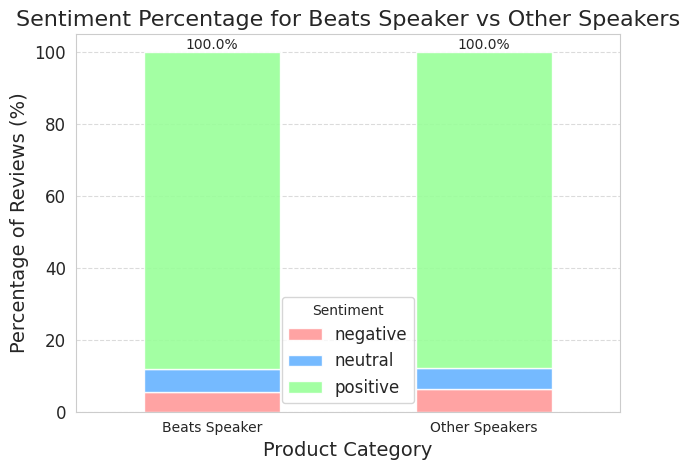

In [ ]:
import matplotlib.pyplot as plt

# Calculate percentage sentiment by product category
sentiment_percentage_by_product = sentiment_counts_by_product.div(sentiment_counts_by_product.sum(axis=1), axis=0) * 100

# Print the sentiment percentage by product
print(sentiment_percentage_by_product)
print(" ")

# Plot sentiment percentages
plt.figure(figsize=(12, 7))  # Increased figure size

# Define a color palette
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Light red, blue, green

# Plotting the stacked bar chart
bars = sentiment_percentage_by_product.plot(kind='bar', stacked=True, color=colors, alpha=0.9)

# Adding total percentage labels on top of bars
for i in range(len(sentiment_percentage_by_product)):
    total_value = sentiment_percentage_by_product.iloc[i].sum()
    plt.text(i, total_value + 1, f"{total_value:.1f}%", ha='center', fontsize=10)

plt.title('Sentiment Percentage for Beats Speaker vs Other Speakers', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Percentage of Reviews (%)', fontsize=14)
plt.xticks(rotation=0)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added grid lines
plt.legend(title='Sentiment', fontsize=12)
plt.tight_layout()
plt.show()


- Sentiment distribution across popular brands

Let's see the sentiment distribution of those brands who had more number of reviews. we choose those with 5star ratings higher than Beats

Insight: We get a better picture now that Beats has good number of positive reviews given the fact it's new.

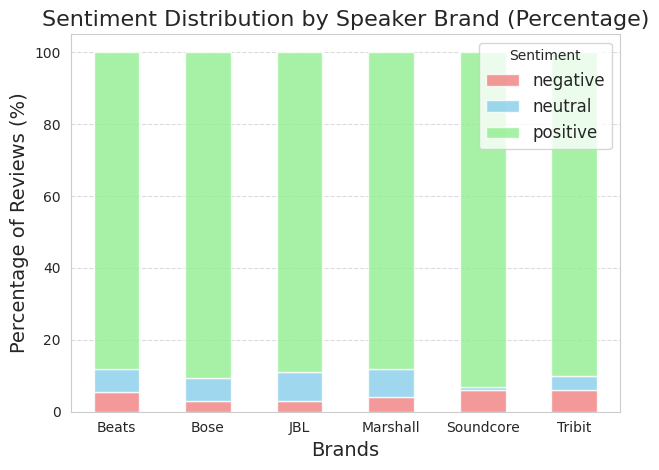

In [ ]:
import matplotlib.pyplot as plt

# Identify popular brands in the product_name column
amazon_reviews['brand'] = amazon_reviews['product_name'].apply(
    lambda x: 'Beats' if 'Beats' in x else
                'Bose' if 'Bose' in x else
                'JBL' if 'JBL' in x else
                'Tribit' if 'Tribit' in x else
                'Marshall' if 'Marshall' in x else
                'Soundcore' if 'Soundcore' in x else
                'Other'
)

# Analyze sentiment distribution by brand
sentiment_by_brand = amazon_reviews.groupby(['brand', 'sentiment_vader']).size().unstack()

# Remove 'Other' brand from the analysis
sentiment_by_brand = sentiment_by_brand.drop('Other', errors='ignore')

# Calculate percentage sentiment by brand
sentiment_percentage_by_brand = sentiment_by_brand.div(sentiment_by_brand.sum(axis=1), axis=0) * 100

# Plot sentiment distribution by brand as percentages
sentiment_percentage_by_brand.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue', 'lightgreen'], alpha=0.8)
plt.title('Sentiment Distribution by Speaker Brand (Percentage)', fontsize=16)
plt.xlabel('Brands', fontsize=14)
plt.ylabel('Percentage of Reviews (%)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added grid lines
plt.legend(title='Sentiment', fontsize=12)
plt.tight_layout()
plt.show()


### 6.2 Results of Sentiment Analysis


All codes below uses the VADER sentiment analyzer to calculate the sentiment scores for each review. The sentiment score ranges from -1 (very negative) to 1 (very positive).

1. Analysis with Ratings for Beats

Insight: From below we see that high rating 5 has more positive score, but interestingly rating 3 also has a little more score than rating 4

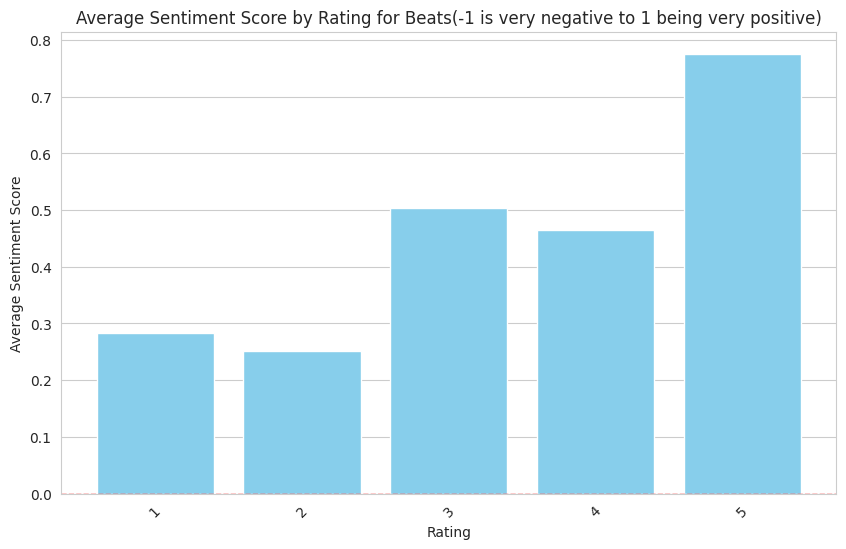

In [ ]:
# Step 1: Perform Sentiment Analysis
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    if isinstance(text, str):  # Ensure the text is a string
        return sid.polarity_scores(text)['compound']
    return np.nan

# Apply the function to get sentiment scores for Beats
beats_reviews['sentiment_score'] = beats_reviews['content'].apply(get_sentiment)

# Step 2: Aggregate Sentiment Scores by Ratings
# Group by rating and calculate the average sentiment score
sentiment_by_rating = beats_reviews.groupby('rating')['sentiment_score'].mean().reset_index()

# Step 3: Visualize the Results
plt.figure(figsize=(10, 6))
plt.bar(sentiment_by_rating['rating'].astype(str), sentiment_by_rating['sentiment_score'], color='skyblue')
plt.title('Average Sentiment Score by Rating for Beats(-1 is very negative to 1 being very positive)')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linewidth=1, linestyle='--')  # Add a line at 0 for reference
plt.grid(axis='y')
plt.show()


2. Beats Reviews by color

Insight: It's quite evident customers love the Black Matte color more.

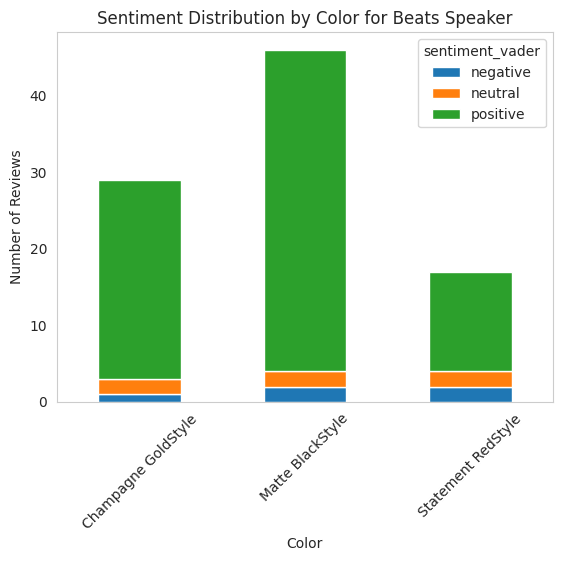

In [ ]:
# Group by product attributes (e.g., color, style) and sentiment for Beats Speakers
beats_reviews = amazon_reviews[amazon_reviews['product_category'] == 'Beats Speaker']
sentiment_by_attributes = beats_reviews.groupby(['color', 'sentiment_vader']).size().unstack()

# Visualize sentiment by attributes (e.g., color)
sentiment_by_attributes.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Color for Beats Speaker')
plt.xlabel('Color')
plt.xticks(rotation=45)
plt.ylabel('Number of Reviews')
plt.show()


3. Aspect-Based Sentiment Analysis

  Insight: Beats have a strong sentiment score for aspects like sound, battery
 and portability.

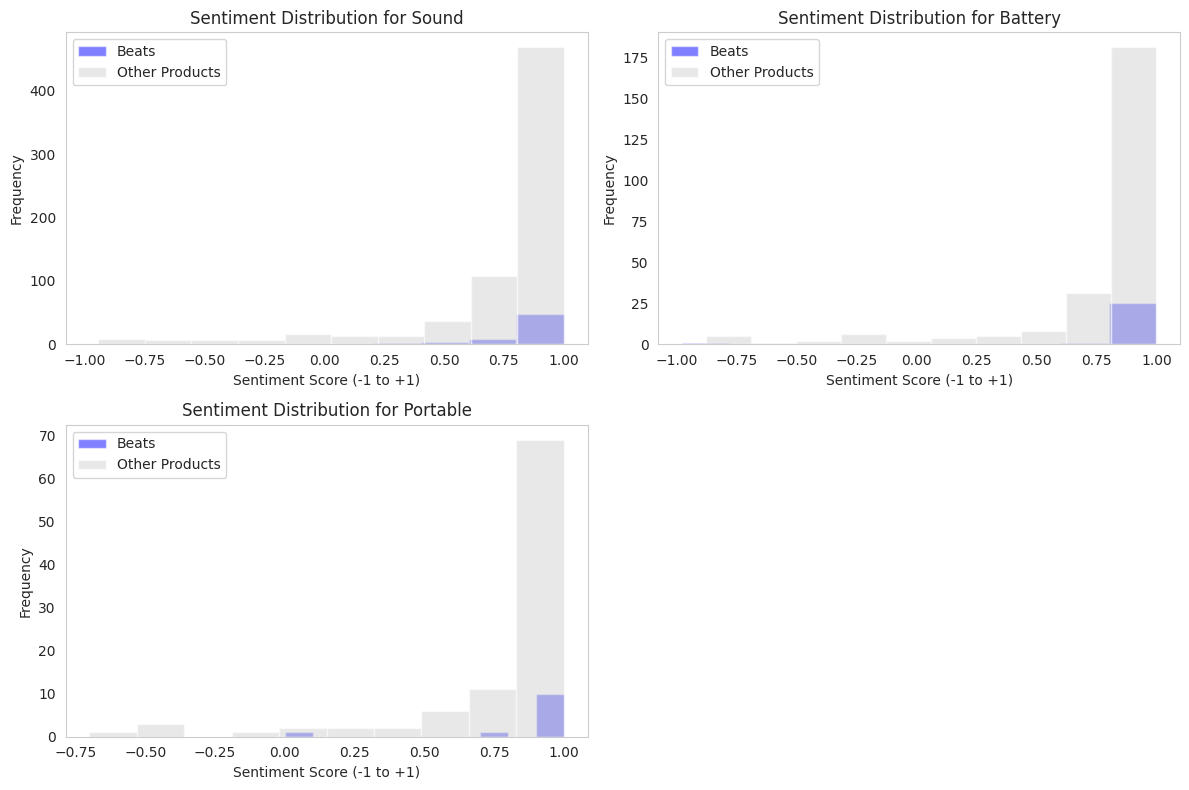

In [ ]:

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define the sentiment function using VADER
def get_sentiment_vader(text):
    if isinstance(text, str):  # Ensure the text is a string
        return sid.polarity_scores(text)['compound']  # Compound sentiment score
    return None

# Define aspect keywords for each product feature
aspects = ['sound', 'battery','portable']

# Check if the review mentions the aspect and apply sentiment to that portion
def aspect_based_sentiment(review, aspect):
    if aspect in review.lower():
        return get_sentiment_vader(review)  # Apply sentiment to the part of review containing the aspect
    else:
        return None

# Apply aspect-based sentiment for each aspect in the review
for aspect in aspects:
    amazon_reviews[f'{aspect}_sentiment'] = amazon_reviews['content'].apply(lambda x: aspect_based_sentiment(x, aspect))

# Example: Analyze average sentiment for each aspect grouped by product (Beats vs Other products)
aspect_sentiments = ['sound_sentiment', 'battery_sentiment', 'portable_sentiment']

# Visualization: Compare sentiment for Beats vs Other products for each aspect
import matplotlib.pyplot as plt

# Filter data for Beats and Other products
beats_reviews = amazon_reviews[amazon_reviews['product_name'].str.contains('Beats', case=False)]
other_reviews = amazon_reviews[~amazon_reviews['product_name'].str.contains('Beats', case=False)]

# Plot comparison of sentiment scores for each aspect
plt.figure(figsize=(12, 8))
for i, aspect_sentiment in enumerate(aspect_sentiments):
    plt.subplot(2, 2, i+1)
    plt.hist(beats_reviews[aspect_sentiment].dropna(), alpha=0.5, label='Beats', color='blue', bins=10)
    plt.hist(other_reviews[aspect_sentiment].dropna(), alpha=0.5, label='Other Products', color='lightgrey', bins=10)
    plt.title(f'Sentiment Distribution for {aspect_sentiment.replace("_sentiment", "").capitalize()}')
    plt.xlabel('Sentiment Score (-1 to +1)')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


4. Main discussion topics for Beats Pill




- Objective:

  Topic Modeling on Reviews: We use topic modeling to identify the main discussion topics in reviews for Beats speakers.

  LDA is a generative probabilistic model used to discover hidden topics within a collection of documents (in this case, reviews). Each topic is a distribution of words, and each document (review) is assumed to be generated from a mixture of topics.

  Word Frequency Analysis: Identify the most frequent words used in review titles. This can give a sense of common themes or sentiments among users. Method: Tokenize the words, remove stop words, and count their frequency.

  Sentiment Analysis: Apply sentiment analysis to the review titles to determine if there are positive, neutral, or negative sentiments. This could show how customers initially perceive the products just based on their review titles.

  N-gram Analysis: Analyze bigrams (pairs of words) or trigrams (triplets of words) in the titles to discover common word combinations, like "great sound" or "poor quality."

  Length Analysis: Measure the length of the review titles and analyze whether shorter or longer titles correspond to different ratings, product types, or sentiments.


- Topic Modeling on Reviews:

Insight:

- Sound Quality: Several topics emphasize the sound quality, especially bass and volume.
- Battery Life: Battery performance is a recurring theme, showing that customers care about how long the speaker lasts on a charge.
- Apple Integration: The frequent mention of Apple suggests that many customers are using the Beats Pill with Apple devices and are discussing compatibility and performance.
- Accessories and Bluetooth: Some customers are talking about the accessories (like cables) and how the speaker connects to other devices, especially through Bluetooth.

In [ ]:

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Filter the reviews to only include Beats speaker products
beats_reviews = amazon_reviews[amazon_reviews['product_name'].str.contains('Beats Pill', case=False)]

# Vectorize the text reviews for Beats speakers
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(beats_reviews['content'])

# Apply Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top words in each topic
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])  # Top 10 words per topic


Topic 1:
['quality', 'sound', 'best', 'overall', 'soundcore', 'returned', '300', 'thing', 'puts', 'good']
Topic 2:
['new', 'good', 'bass', 'quality', 'apple', 'great', 'beats', 'pill', 'sound', 'speaker']
Topic 3:
['battery', 'music', 'loud', 'great', 'pill', 'beats', 'volume', 'sound', 'bass', 'speaker']
Topic 4:
['worth', 'ios', 'cable', 'pro', 'great', 'sounds', 'need', 'love', 'pill', 'bluetooth']
Topic 5:
['volume', 'life', 'beats', 'apple', 'like', 'battery', 'bass', 'great', 'sound', 'speaker']


- Sentiment Analysis on Review Titles(summary of reviews given as title for that review)

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis on review titles
beats_reviews['title_sentiment'] = beats_reviews['review_title'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Classify sentiment based on the compound score
beats_reviews['title_sentiment_label'] = beats_reviews['title_sentiment'].apply(
    lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral'
)

# Show the sentiment distribution
sentiment_distribution = beats_reviews['title_sentiment_label'].value_counts(normalize=True) * 100
print(sentiment_distribution)


title_sentiment_label
positive    61.956522
neutral     30.434783
negative     7.608696
Name: proportion, dtype: float64


- Bigrams Analysis

Insight:
  Positive reviews: Some of the frequent words as bigrams in reviews are battery quality, sound quality, great sound etc.

  Negative reviews: Power button, volume bass, battery life etc.

Top 10 Negative Bigrams: [('power button', 3), ('low end', 2), ('volume bass', 2), ('bass heavy', 2), ('beats app', 2), ('battery life', 2), ('hold long', 2), ('bluetooth speaker', 2), ('sound quality', 2), ('new pill', 1)]
Top 10 Positive Bigrams: [('beats pill', 29), ('battery life', 21), ('sound quality', 19), ('great sound', 11), ('bluetooth speaker', 8), ('new beats', 7), ('sound great', 6), ('portable speaker', 5), ('pill 2024', 5), ('water resistant', 4)]


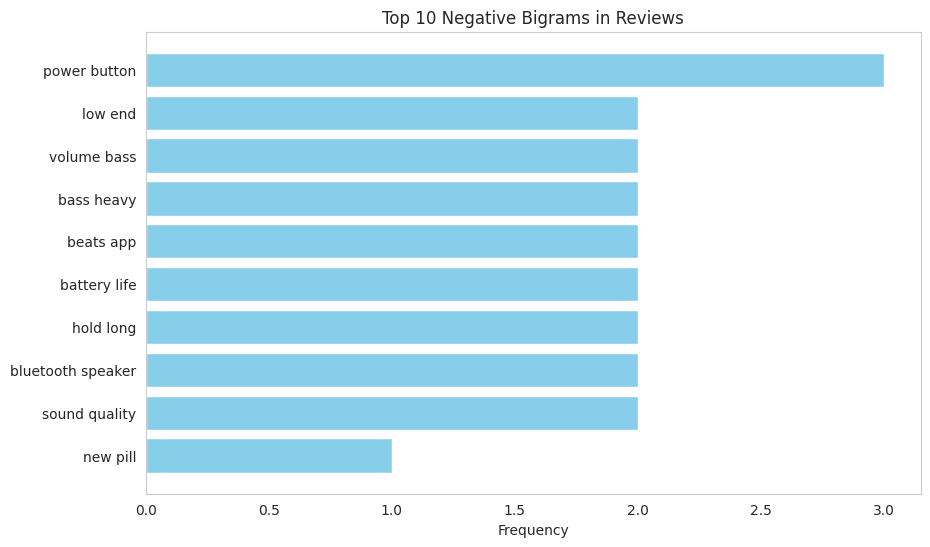

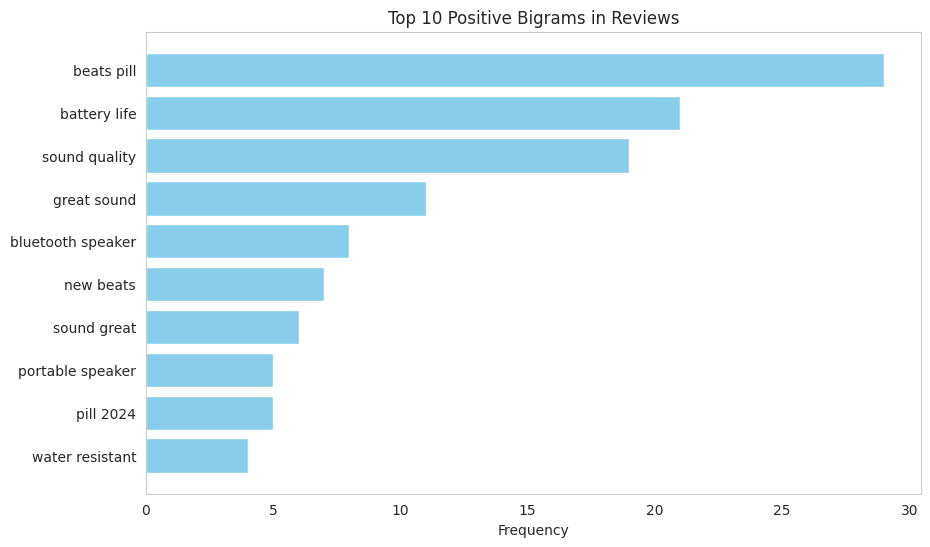

In [ ]:
# Assuming you have VADER sentiment analyzer imported
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis on review content (instead of title)
beats_reviews['content_sentiment'] = beats_reviews['content'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Classify sentiment based on the compound score
beats_reviews['content_sentiment_label'] = beats_reviews['content_sentiment'].apply(
    lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral'
)

# Filter positive and negative reviews
negative_reviews = beats_reviews[beats_reviews['content_sentiment_label'] == 'negative']['content'].dropna()
positive_reviews = beats_reviews[beats_reviews['content_sentiment_label'] == 'positive']['content'].dropna()


from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Function to extract top bigrams
def get_top_ngrams(corpus, n=None, ngram_range=(2, 2)):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 10 bigrams for negative and positive reviews
top_10_negative_bigrams = get_top_ngrams(negative_reviews, n=10)
top_10_positive_bigrams = get_top_ngrams(positive_reviews, n=10)

# Display the top bigrams
print("Top 10 Negative Bigrams:", top_10_negative_bigrams)
print("Top 10 Positive Bigrams:", top_10_positive_bigrams)


# Function to plot bigrams
def plot_bigrams(bigrams, title):
    words = [x[0] for x in bigrams]
    counts = [x[1] for x in bigrams]
    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Plot the bigrams for negative and positive reviews
plot_bigrams(top_10_negative_bigrams, "Top 10 Negative Bigrams in Reviews")
plot_bigrams(top_10_positive_bigrams, "Top 10 Positive Bigrams in Reviews")




- WordCloud

Insight: we find out similar results as before. For positive reviews some of the frequent words in reviews are around sound, volume.
For Negative reviews powerful words are button, bass, battery  etc.


Let's find out the intensity of words used in positive reviews for Beats Pill

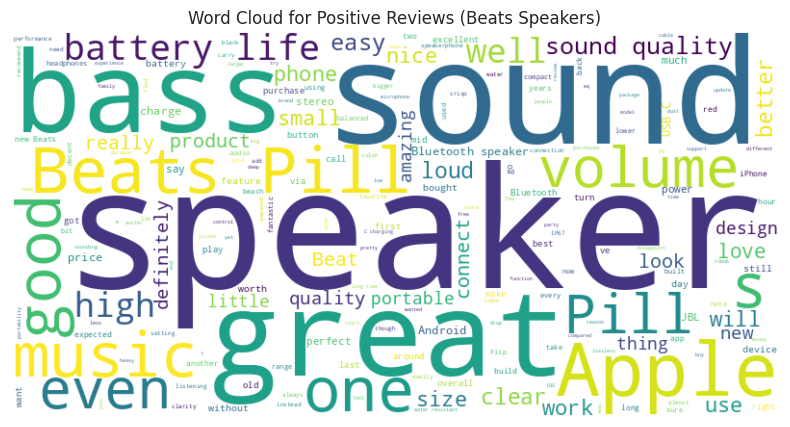

In [ ]:
from wordcloud import WordCloud

# Create a word cloud for positive reviews for Beats speakers
positive_reviews = " ".join(review for review in amazon_reviews[amazon_reviews['product_name'].str.contains('Beats')]['content'][amazon_reviews['sentiment_vader'] == 'positive'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews (Beats Speakers)')
plt.show()


Now, let's also see the intensity of words for negative reviews to understand what are the things customer don't like.

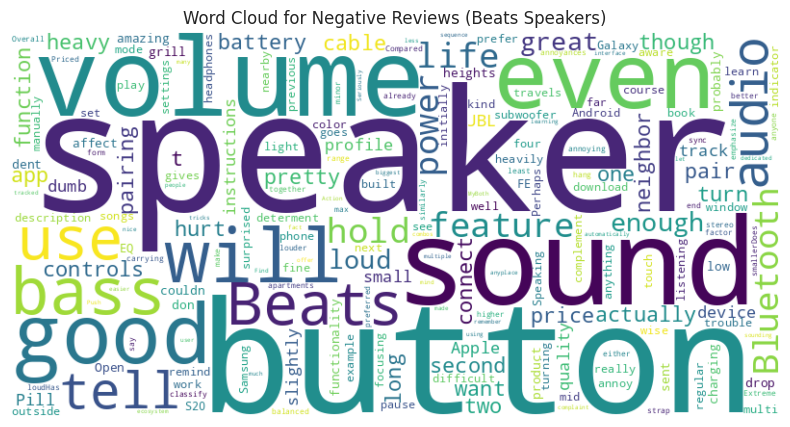

In [ ]:
# Create a word cloud for negative reviews for Beats speakers
negative_reviews = " ".join(review for review in amazon_reviews[amazon_reviews['product_name'].str.contains('Beats')]['content'][amazon_reviews['sentiment_vader'] == 'negative'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews (Beats Speakers)')
plt.show()


5. Review Length Analysis
Analyze the relationship between the length of reviews (number of words) and their sentiment scores. Do longer reviews tend to be more positive or negative?

Insight: We see longer reviews do have more sentiment score but most review length are within approx 250 words, so possibly customers who give good reviews can complete the review concisely as well.

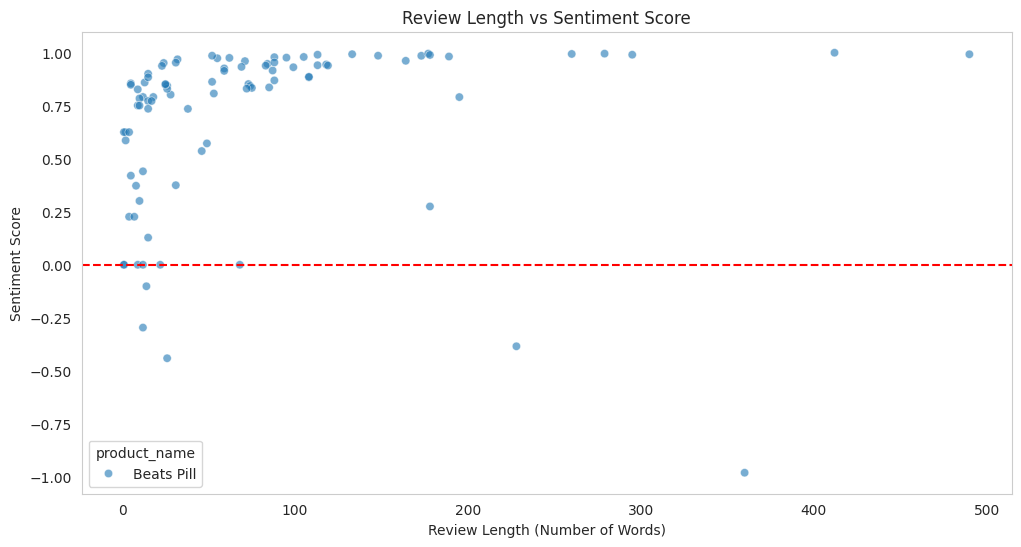

In [ ]:
# Calculate the length of each review
beats_reviews['review_length'] = beats_reviews['content'].apply(lambda x: len(x.split()))

# Plotting the relationship between review length and sentiment score
plt.figure(figsize=(12, 6))
sns.scatterplot(data=beats_reviews, x='review_length', y='sentiment_score', hue='product_name', alpha=0.6)
plt.title('Review Length vs Sentiment Score')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Sentiment Score')
plt.axhline(0, color='red', linestyle='--')  # Line for neutral sentiment
plt.show()


6. Correlation Between Features
Calculate and visualize the correlation between different numerical features (like rating, helpful_count, and sentiment score) to see if there are any interesting relationships.

** Key Observations**

- Rating and Sentiment Score:

There is a moderate positive correlation (0.381) between the rating and sentiment score. This suggests that as sentiment (presumably positive) increases, the product rating also tends to increase, indicating that reviews with more positive sentiments are likely to have higher ratings.

- Helpful Count and Sentiment Score:

The correlation between helpful count and sentiment score is slightly negative (-0.121), indicating that reviews that are rated as more helpful may not necessarily align with more positive sentiments. This could suggest that helpful reviews might include critical feedback or detailed information.

- Helpful Count and Review Length:

There is a moderate positive correlation (0.307) between helpful count and review length. This indicates that longer reviews are perceived as more helpful, which is common as detailed reviews often provide more context and insights.

- Rating and Helpful Count:

The correlation between rating and helpful count is slightly negative (-0.090), indicating that higher ratings do not necessarily lead to reviews being deemed more helpful. This may reflect that short, high-rated reviews might not provide the depth that other users find helpful.
Review Length and Sentiment Score:

The correlation between review length and sentiment score is very weak (0.125), suggesting that the length of a review does not significantly influence the sentiment expressed within it.

Correlation Scores:
                   rating  helpful_count  sentiment_score  review_length
rating           1.000000      -0.090444         0.381253      -0.000829
helpful_count   -0.090444       1.000000        -0.120810       0.306611
sentiment_score  0.381253      -0.120810         1.000000       0.125136
review_length   -0.000829       0.306611         0.125136       1.000000


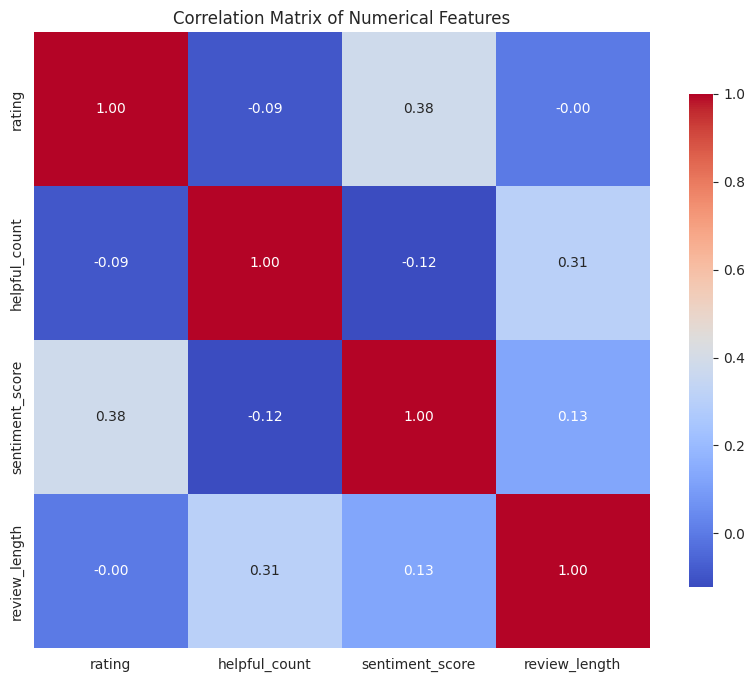

In [ ]:
# Select numerical columns for correlation analysis
numerical_cols = ['rating', 'helpful_count', 'sentiment_score', 'review_length']
correlation_matrix = beats_reviews[numerical_cols].corr()

# Print the correlation scores
print("Correlation Scores:")
print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## 7. AI-Generated Insights

### 7.1 Using Gemini AI
Gemini AI is used as a API call to analyze the sentiment around reviews of customers for each product. Here, we provide batches to process(in 100 as we have 100 reviews of each product) and extract the insights

#### Setup the Gemini AI

In [ ]:
import pandas as pd
import google.generativeai as genai

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Extern /Data Gathering/updated_dataset.csv')

# Replace 'your_api_key' with the actual API key(My API key is not given for privacy purposes)
api_key = "your_api_key"

# Function to analyze reviews using Gemini AI
def analyze_reviews(reviews, api_key,prompt_message):
    genai.configure(api_key=api_key)

    model = genai.GenerativeModel(
        model_name="gemini-1.5-flash",
        generation_config={
            "temperature": 1,
            "top_p": 0.95,
            "top_k": 64,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain",
        },
    )

    chat_session = model.start_chat(history=[])

    prompt = prompt_message + "\n\n".join(reviews)
    response = chat_session.send_message(prompt)
    return response.text



### 7.2 Key Insights



#### Competitive analysis of Beats and other products with AI based on prompt asking for insights sound, bass, portability, design.

In [ ]:
import math
# Split the data into batches of 100 reviews
batch_size = 100
batches = math.ceil(len(df) / batch_size)  # Calculate the number of batches

# Initialize list to store individual insights for each review
insights_list = []

# Loop through each batch and get insights
for i in range(batches):
    start = i * batch_size
    end = min(start + batch_size, len(df))
    batch_reviews = df['content'][start:end].tolist()

    # Define your prompt message (adjust as needed)
    prompt_message = "You are an expert Data analyst, help to find the insights of each product from the following reviews based on sound quality, bass, battery, portability, design"

    # Call the analysis function and store the result
    result = analyze_reviews(batch_reviews, api_key, prompt_message)

    # Split result by individual insights (adjust split logic based on your output format)
    insights_list.extend(result.split('\n\n'))  # Splits on double line breaks for separate insights

# Store the insights in a DataFrame with each insight as a separate row
insights_df = pd.DataFrame(insights_list, columns=['insight'])
insights_df.to_csv('/content/drive/MyDrive/Extern /Data Gathering/insights.csv', index=False)

print("Analysis completed and saved to CSV.")


Analysis completed and saved to CSV.


I have manually visited the csv file to get the insights which are summarized in the later sections.

#### Prompts to understand where does Beats stand

1. What are the best features that customers like in Beats Pill and are talking more about
2. Identify different customer segments for Beats Pill based on the following reviews
3. What are the unique selling points of the Beats Pill according to the reviews when compared to the highest 5.0 rated product JBL Flip 6
4. Act as an analyst and give me a competitive analysis of Beats when compared to other products based on the following reviews

Note: Please unhide output section to view results

In [ ]:
reviews_column_name = 'content'
reviews = df[reviews_column_name].tolist()

# Send prompts
prompt_message = "What are the best features that customers like in Beats Pill and are talking more about:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Beats Pill 2024: Features Customers Love and Talk About

Based on the provided reviews, here are the key features customers are raving about and those causing some frustration:

**Loved Features:**

* **Sleek and compact design:** The Beats Pill 2024 is praised for its stylish, pill-shaped form factor, making it easy to carry and aesthetically pleasing.
* **Excellent sound quality:** Customers consistently mention the "punchy bass" and "crystal clear" sound, exceeding expectations for a speaker of its size.
* **Long battery life:** The advertised 24 hours of battery life is a significant selling point, allowing for extended listening sessions without interruption.
* **IP67 water and dust resistance:** This feature gives customers peace of mind to take the speaker to the beach, pool, or other outdoor activities.
* **Seamless iPhone integration:**  Being part of the Apple ecosystem, the speaker seamlessly connects and works with iPhones.
* **USB-C charging:** This modern charging stan

In [ ]:
reviews_column_name = 'content'
reviews = df[reviews_column_name].tolist()

# Send prompts
prompt_message = "Identify different customer segments for Beats Pill based on the following reviews:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Beats Pill Customer Segments:

Based on the reviews, here are some potential customer segments for the Beats Pill:

**1. Apple Ecosystem Enthusiasts:**

* **Characteristics:**  Apple users who value seamless integration with their iPhones and other Apple devices. 
* **Motivations:**  Desire for a speaker that connects easily and quickly to their existing Apple ecosystem, with features like "Find My" integration for location tracking.
* **Reviews:**  "If you are in the Apple Ecosystem, this speaker was made for you as it connects to your iPhone the minute you turn it on with a very satisfying screen animation."  "Being in the Apple ecosystem it's nice that it's interconnected with my devices."

**2. On-the-Go Music Lovers:**

* **Characteristics:** Individuals who prioritize portability, durability, and long battery life for listening to music on the go.
* **Motivations:**  Desire for a speaker that can be easily taken to the beach, camping, or other outdoor adventures without sacrif

In [ ]:
reviews_column_name = 'content'
reviews = df[reviews_column_name].tolist()

# Send prompts
prompt_message = "What are the unique selling points of the Beats Pill according to the reviews when compared to the highest 5.0 rated product JBL Flip 6:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Beats Pill vs. JBL Flip 6: Unique Selling Points Based on Reviews

Here's a breakdown of the unique selling points of the Beats Pill, based on the reviews provided, compared to the JBL Flip 6:

**Beats Pill:**

* **Apple Ecosystem Integration:** Seamless connection with iPhones, including satisfying screen animations and "Find My" functionality. 
* **Speakerphone Feature:** Doubles as a speakerphone for clear conference calls and Teams meetings.
* **Lossless Audio via USB-C:** Enables lossless music playback from Apple Music via USB-C connection.
* **Punchy Bass and Clear Sound:** Delivers a powerful, vibrant sound with punchy bass and clear vocals. 
* **IP67 Rating:** Dust and water resistant for outdoor use.
* **Long Battery Life:** Advertised at a whopping 24 hours, but some reviewers note shorter battery life at higher volumes.

**JBL Flip 6:**

* **Sleek and Compact Design:** Small and easy to carry, with a stylish design.
* **Well-Built and Durable:** Solid construction with a

In [ ]:
reviews_column_name = 'content'
reviews = df[reviews_column_name].tolist()

# Send prompts
prompt_message = "Act as an analyst and give me a competitive analysis of Beats when compared to other products based on the following reviews:"
insights = analyze_reviews(reviews, api_key, prompt_message)
print(insights)

## Competitive Analysis of Beats Pill (2024)

**Strengths:**

* **Sound Quality:**  Reviewers consistently praise the Beats Pill's sound quality, highlighting its punchy bass, clear vocals, and overall balance. It's considered to be a strong performer in its size class.
* **Portability:**  The compact and sleek design makes it easy to carry around, making it ideal for on-the-go listening.
* **Build Quality:**  Reviewers comment on the Pill's solid construction and premium feel, suggesting it's durable and built to last.
* **Water Resistance:** The IP67 rating assures users of its dust and water resistance, making it suitable for outdoor use and activities.
* **Battery Life:**  The 24-hour battery life is a significant advantage, enabling extended listening sessions without the need for frequent charging.
* **Apple Ecosystem Integration:**  The Pill seamlessly integrates with Apple devices, connecting instantly and offering features like "Find My" compatibility.
* **Speakerphone Functio

### 7.3 Summary of Insights and Interpretation


Summary of insights:

The Beats Pill (2024) is a competitive offering in the portable speaker market, providing superior sound quality, durability, and unique features like Apple ecosystem integration and speakerphone functionality. However, it faces challenges related to sound performance at high volumes, limited control options, and pricing.

## 8. Comparative Analysis

### 8.1 Competitor Overview



- Market Positioning Overview

  Beats Pill:

Average Rating: 4.50
Five-Star Count: 70
Helpful Count: 145
Average Sell Price: $149.95
Positioning: While the Beats Pill has a respectable average rating, it falls behind most competitors in terms of ratings and the number of five-star reviews. Its average price is aligned with the mid-range of the competitors but is higher than lower-rated products.

  Competitors:

* Top Competitors: JBL Flip 6, Bose SoundLink Flex, and JBL Charge 5 stand out
with average ratings above 4.80, demonstrating strong customer satisfaction.

* Pricing Strategies:
JBL Flip 6 is the most affordable option among the top-rated products, offering an excellent average rating of 4.88 and a significant number of helpful votes of 72.
Bose SoundLink Flex offers a similar price point to Beats but exceeds it in average rating at 4.87 and has a much higher number of helpful votes , indicating strong customer approval and engagement.
JBL Charge 5 price at 179.95 and Tribit StormBox Blast at 199.99 maintain higher prices while still achieving high ratings and positive reviews.

- Overall Strengths:
Brands like Bose and JBL lead the market in both ratings and customer engagement (helpful votes), suggesting they have strong brand loyalty and positive customer experiences.
Marshall Emberton II and Bose SoundLink Micro also show a solid positioning with good ratings and competitive prices.

In [ ]:
# Group by product_name to calculate key metrics
competitor_summary = amazon_reviews.groupby('product_name').agg(
    average_rating=('rating', 'mean'),
    five_star_count=('rating', lambda x: (x == 5).sum()),
    helpful_count=('helpful_count', 'sum'),
    average_sell_price=('sell_price(in $)', 'mean')
).reset_index()

# Sort by average rating to get top performers
competitor_summary = competitor_summary.sort_values(by='average_rating', ascending=False)

# Print the summary to get an overview
print(competitor_summary)


# Brief text summary
for index, row in competitor_summary.iterrows():
    print(f"{row['product_name']} has an average rating of {row['average_rating']:.2f}, "
          f"with {row['five_star_count']} 5-star ratings and an average price of ${row['average_sell_price']:.2f}. "
          f"It has accumulated {row['helpful_count']} helpful votes.")


               product_name  average_rating  five_star_count  helpful_count  average_sell_price
5                JBL Flip 6            4.88               88             72              129.95
1       Bose SoundLink Flex            4.87               88            526              149.00
4              JBL CHARGE 5            4.86               87            267              179.95
10    Tribit StormBox Blast            4.80               82            477              199.99
7      Marshall Emberton II            4.78               81            261              115.99
2      Bose SoundLink Micro            4.74               81            979              119.00
9     Soundcore Motion X600            4.74               76            646              199.99
6        Jabra Speak 710 UC            4.58               71            348              162.99
0                Beats Pill            4.50               70            145              149.95
8   Sony SRS-XG300 X-Series            4

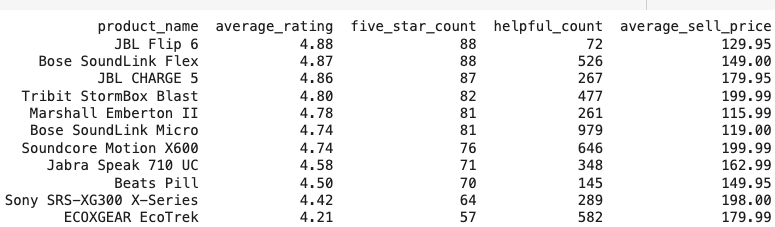

### 8.2 Comparison of Sentiments


#### Average sentiment scores of Beats and competitors

Insight: Beats has an average sentiment score of around 0.7 which is quite good compared to many other products as it's position is 5 amongst 11 of them.

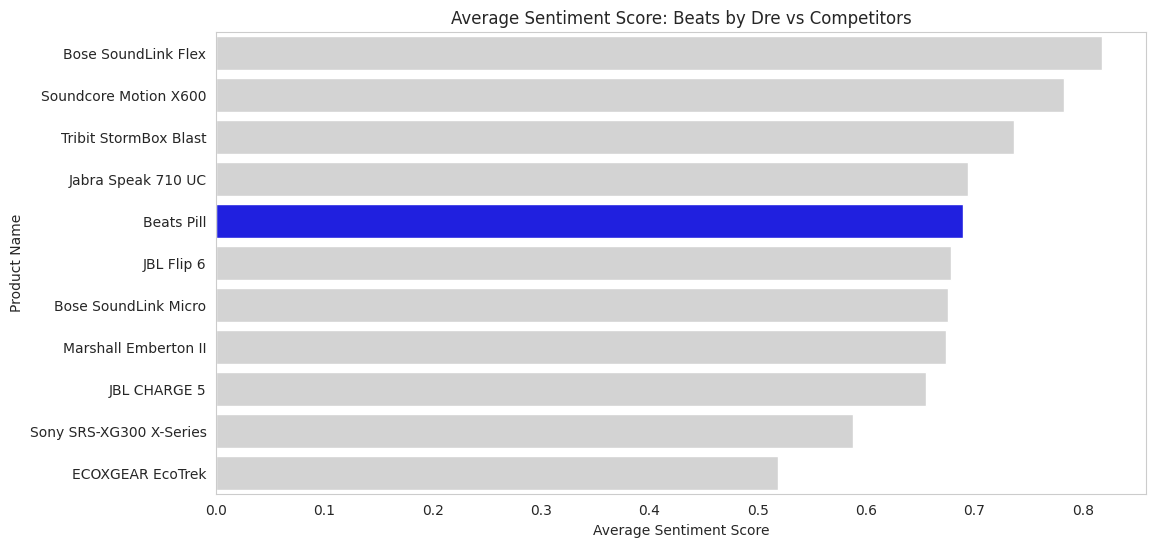

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define the sentiment function using VADER
def get_sentiment_vader(text):
    if isinstance(text, str):  # Ensure the text is a string
        return sid.polarity_scores(text)['compound']  # Compound sentiment score
    return None

# Apply the sentiment function to the 'content' column
amazon_reviews['sentiment_score'] = amazon_reviews['content'].apply(get_sentiment_vader)

# Group by product and calculate average sentiment
sentiment_by_product = amazon_reviews.groupby('product_name')['sentiment_score'].mean().reset_index()

# Sort by sentiment score
sentiment_by_product = sentiment_by_product.sort_values(by='sentiment_score', ascending=False)

# Highlight Beats in a different color
plt.figure(figsize=(12, 6))
colors = ['blue' if 'Beats' in product else 'lightgrey' for product in sentiment_by_product['product_name']]
sns.barplot(x='sentiment_score', y='product_name', data=sentiment_by_product, palette=colors)

# Add title and labels
plt.title('Average Sentiment Score: Beats by Dre vs Competitors')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Product Name')

# Show plot
plt.show()


#### Sentiment Trend Analysis over time

Analyze how sentiment has changed over time for Beats speakers and other speakers. This could help identify if customer perception improved or worsened since the launch of the Beats speaker. We focus on year 2024 as before that Beats Pill was not available in the market.

Insight: So after launch compared to other competitors the sentiment score is clearly upwards on July 2024 and Sep 2024, with a little drop on Aug 2024 but still higher than others. This means customers are giving good reviews continously.

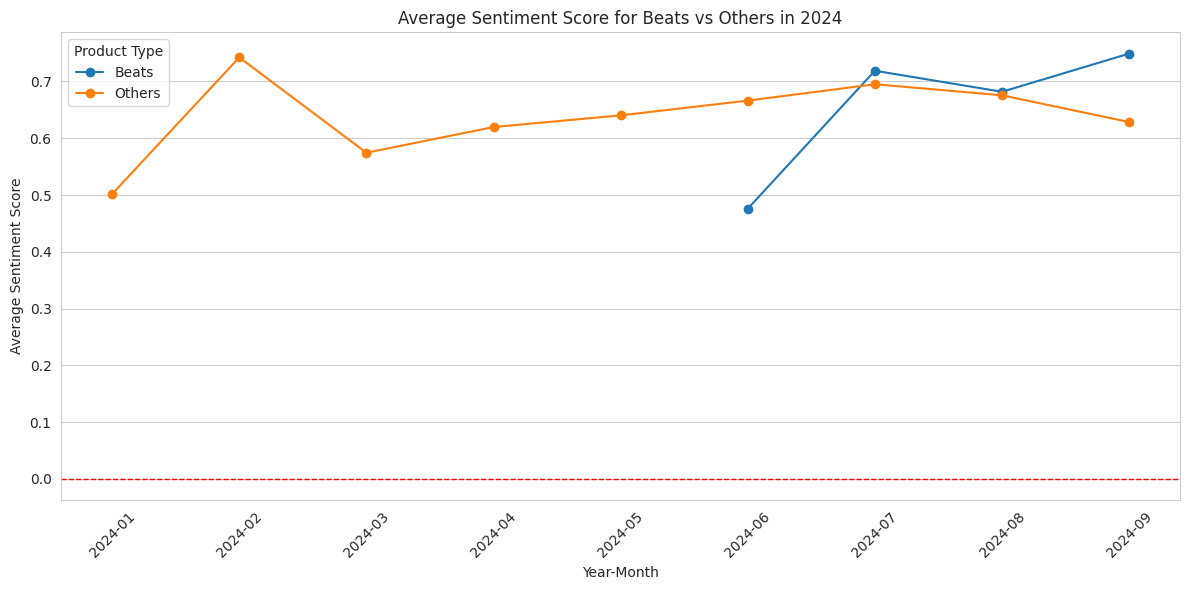

In [ ]:
# Step 1: Apply the function to get sentiment scores
amazon_reviews['sentiment_score'] = amazon_reviews['content'].apply(get_sentiment)

# Step 2: Create a Year-Month Column
amazon_reviews['year_month'] = amazon_reviews['review_year'].astype(str) + '-' + amazon_reviews['review_month'].astype(str).str.zfill(2)

# Step 3: Filter for the year 2024
reviews_2024 = amazon_reviews[amazon_reviews['review_year'] == 2024]

# Step 4: Group by Year-Month and Calculate Average Sentiment Score for 2024
sentiment_2024 = reviews_2024.groupby('year_month')['sentiment_score'].mean().reset_index()

#### Filter for Beats Product
beats_reviews = reviews_2024[reviews_2024['product_name'].str.contains('Beats', case=False, na=False)]

# Group by Year-Month and Calculate Average Sentiment Score for Beats in 2024
sentiment_beats_2024 = beats_reviews.groupby('year_month')['sentiment_score'].mean().reset_index()

##### Create a New Column for Product Type (Beats vs Others)
reviews_2024['product_type'] = np.where(reviews_2024['product_name'].str.contains('Beats', case=False, na=False), 'Beats', 'Others')

# Group by Year-Month and Product Type and Calculate Average Sentiment Score
sentiment_comparison = reviews_2024.groupby(['year_month', 'product_type'])['sentiment_score'].mean().unstack().reset_index()

# Plot the Sentiment Scores Over Time for Beats vs Others
plt.figure(figsize=(12, 6))
for product_type in sentiment_comparison.columns[1:]:
    plt.plot(sentiment_comparison['year_month'], sentiment_comparison[product_type], marker='o', linestyle='-', label=product_type)

plt.title('Average Sentiment Score for Beats vs Others in 2024')
plt.xlabel('Year-Month')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linewidth=1, linestyle='--')  # Add a line at 0 for reference
plt.grid(axis='y')
plt.legend(title='Product Type')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

### 8.3 SWOT Analysis
Conduct a SWOT analysis (Strengths, Weaknesses, Opportunities, Threats) for Beats by Dre based on the comparative data.

- Strengths
1. **Sound Quality**: The Beats Pill is praised for its punchy bass and clear sound, making it a preferred choice among audiophiles.
2. **Apple Ecosystem Integration**: Seamless connectivity with Apple devices enhances user experience, especially for existing Apple customers.
3. **Portability and Design**: Its sleek, compact design makes it highly portable, appealing to on-the-go consumers.
4. **Durability**: With an IP67 rating for water and dust resistance, it is suitable for outdoor activities.
5. **Battery Life**: A strong selling point, with an advertised battery life of up to 24 hours, allowing extended use without frequent recharging.
6. **Unique Features**: The speakerphone functionality and lossless audio playback via USB-C set it apart from many competitors.

- Weaknesses
1. **Limited Volume Performance**: Some users report sound distortion at high volumes, which may deter those seeking a loud speaker.
2. **High Price Point**: Positioned at a higher price compared to similar offerings, which may limit accessibility for budget-conscious consumers.
3. **Lack of Customization**: Absence of an app for EQ settings and customization could disappoint users seeking tailored audio experiences.
4. **Negative User Feedback**: Issues like loud startup/shutdown tones and concerns about build quality could affect brand perception.
5. **Dependence on Apple Ecosystem**: While beneficial for Apple users, it may alienate potential customers who use other operating systems.

- Opportunities
1. **Expanding Market**: Growth in portable speaker demand, especially among young consumers who value portability and sound quality.
2. **Product Diversification**: Potential to introduce new models or variations targeting different consumer segments (e.g., sports enthusiasts, outdoor adventurers).
3. **Partnerships**: Collaborations with artists or influencers to promote the brand and create exclusive content could enhance brand visibility.
4. **Emerging Technologies**: Integrating advanced technologies like voice assistance and smart features could broaden the appeal and functionality of the product.
5. **Global Market Expansion**: Opportunities to enter or strengthen presence in emerging markets where portable audio devices are gaining popularity.

- Threats
1. **Intense Competition**: Strong rivals like JBL, Bose, and Sonos continuously innovate, making it crucial for Beats to stay ahead in product features and marketing.
2. **Changing Consumer Preferences**: Shifts in consumer tastes toward different audio formats or brands could impact sales.
3. **Economic Factors**: Economic downturns or reduced consumer spending can affect premium product sales.
4. **Negative Reviews**: Persistent negative feedback regarding sound quality or features could diminish brand reputation and consumer trust.
5. **Market Saturation**: The portable speaker market is becoming crowded, making it harder to differentiate and maintain market share.

- Conclusion
The Beats Pill has several strengths, particularly in sound quality and integration with Apple products, positioning it well in the market. However, it faces challenges like high pricing and sound performance issues at volume. By leveraging opportunities for expansion and innovation, while being mindful of competitive threats, Beats can continue to grow and strengthen its position in the portable speaker market.


## 9. Strategic Recommendations

### 9.1 Product Improvements
Based on the analysis, suggest specific product improvements.

#### Suggested Product Improvements for Beats Pill

1. **Enhanced Sound Quality at High Volumes**
   - **Action**: Work on improving the speaker's performance at higher volumes to reduce distortion and ensure clarity without compromising bass quality. This could involve hardware upgrades or advanced audio processing techniques.

2. **Customizable Sound Features**
   - **Action**: Develop a companion app that allows users to customize equalizer (EQ) settings, enabling them to adjust the sound profile according to their preferences. This would cater to audiophiles who seek a tailored listening experience.

3. **Volume Control Options**
   - **Action**: Introduce a feature to adjust startup and shutdown tones, giving users the option to mute or lower the volume of these sounds, enhancing user experience.

4. **Durability Enhancements**
   - **Action**: Consider using more robust materials to improve build quality and resistance to damage from drops or bumps. This could enhance the overall durability and longevity of the speaker.

5. **Broaden Compatibility**
   - **Action**: While maintaining Apple ecosystem integration, consider expanding Bluetooth compatibility features to ensure optimal performance with Android devices and other platforms, appealing to a wider audience.

6. **Increased Battery Efficiency**
   - **Action**: Investigate ways to improve battery efficiency to maintain longer playtime, particularly when using high-volume settings. This may involve optimizing power consumption in the hardware design.

7. **Improved Accessory Offerings**
   - **Action**: Provide additional accessories such as a protective carrying case or straps for easier transport, which could enhance the portability aspect for consumers.

8. **User Feedback Integration**
   - **Action**: Regularly gather user feedback through surveys or an integrated feedback feature in the app to identify common pain points and suggestions for future updates or iterations.

9. **Color Options and Customization**
   - **Action**: Expand the range of available colors and finishes, allowing users to choose options that suit their personal style. Limited edition color collaborations with artists or brands could also attract interest.

10. **Marketing and Educational Content**
    - **Action**: Create marketing content that highlights the unique features of the Beats Pill, such as its sound quality, durability, and integration with Apple devices. Tutorials on maximizing usage and customization could also enhance customer satisfaction.


### 9.2 Marketing Strategies
Provide recommendations for marketing strategies that could enhance consumer perception and satisfaction.

#### Marketing Strategies for Beats by Dre

1. **Leverage Influencer Partnerships**
   - **Action**: Collaborate with influencers and musicians who align with the brand's image. Authentic endorsements can help reach target audiences and build credibility.

2. **Create Engaging Social Media Campaigns**
   - **Action**: Utilize platforms like Instagram, TikTok, and YouTube to showcase user-generated content and creative campaigns that highlight the Beats Pill's features. Encourage customers to share their experiences using branded hashtags.

3. **Targeted Email Marketing**
   - **Action**: Develop personalized email campaigns that offer exclusive discounts, product tips, and updates about new features. Tailored content based on consumer preferences can enhance engagement.

4. **Interactive Online Content**
   - **Action**: Create interactive quizzes or polls on the website and social media to engage users in discussions about sound preferences and product features. This can also serve to educate potential customers about the benefits of the Beats Pill.

5. **Customer Testimonials and Case Studies**
   - **Action**: Showcase real customer testimonials and case studies that highlight positive experiences with the Beats Pill. This can help potential buyers visualize the product's benefits.

6. **In-Store Experience Enhancements**
   - **Action**: Improve in-store demonstrations to allow potential customers to test the sound quality and features of the Beats Pill. Knowledgeable staff can provide valuable insights and tips during the demonstration.

7. **Targeted Promotions and Bundles**
   - **Action**: Offer promotions or bundle deals with other Apple products, like iPhones or Macs, to emphasize the seamless integration within the Apple ecosystem and create added value.

8. **Engage with the Community**
   - **Action**: Sponsor or host community events, music festivals, or workshops that emphasize music and sound. This builds brand loyalty and connects the product with the music lifestyle.

9. **Sustainability Messaging**
   - **Action**: Highlight any eco-friendly initiatives or materials used in the Beats Pill's production. Increasingly, consumers value sustainability and may respond positively to brands that prioritize it.

10. **Post-Purchase Engagement**
    - **Action**: Implement follow-up communication after purchase to gather feedback and offer customer support. This shows that the brand cares about consumer satisfaction and encourages repeat business.

11. **Educational Content**
    - **Action**: Create content, such as blog posts or videos, that educates consumers on how to maximize their Beats Pill experience. Topics could include tips for sound optimization, battery maintenance, and integration with other devices.

12. **Loyalty Programs**
    - **Action**: Develop a loyalty program that rewards customers for repeat purchases, referrals, and engagement on social media. This can enhance consumer satisfaction and encourage brand loyalty.


### 9.3 Future Research
Beats Pill is a very new product in the market, and we would need more number of reviews to be collected over time to do a more deep analysis.

## 10. Conclusion
Summarize the key findings and their implications, and reflect on the overall project and its contribution to understanding consumer sentiment for Beats by Dre.

Beats has a lower average rating compared to its competitors and fewer five-star ratings, indicating potential challenges in customer satisfaction.
Competitors such as JBL and Bose are leveraging strong ratings, customer engagement, and strategic pricing to capture the market effectively.
The market position of Beats could benefit from strategies aimed at improving customer feedback and increasing the perceived value of their products relative to competitors.

### Summary of Key Findings and Implications

 Key Findings
1. **Positive Sentiment**:
   - The Beats Pill received a high percentage of positive sentiment (88.04%) in reviews, comparable to competitors, indicating a favorable reception among consumers.

2. **Strong Features**:
   - Customers particularly appreciated the sound quality, battery life, and seamless integration with the Apple ecosystem. The speakerphone functionality and lossless audio playback via USB-C were unique selling points.

3. **Customer Segmentation**:
   - Identified distinct customer segments, including Apple ecosystem enthusiasts, on-the-go music lovers, audiophiles, and value-conscious consumers. Each segment values different features of the Beats Pill.

4. **Competitive Positioning**:
   - While the Beats Pill has strong sound quality and features, it faces stiff competition from brands like JBL and Bose, which have a broader range of positive reviews and consistent sales growth.

5. **Areas for Improvement**:
   - Users expressed concerns over bass distortion at high volumes, the lack of a dedicated app for customization, and loud startup/shutdown tones, suggesting opportunities for product enhancements.

6. **Review Dynamics**:
   - The analysis indicated a decline in the number of reviews over time, raising questions about consumer interest and post-launch performance. The initial spike in reviews post-launch could indicate early adopters, with subsequent consumers showing less engagement.

### Implications
- **Product Development**: The insights regarding user feedback on sound performance and usability highlight critical areas for product improvement. Addressing these concerns can enhance customer satisfaction and loyalty.

- **Marketing Strategies**: Understanding consumer segments allows for more targeted marketing efforts. Highlighting features that resonate with each segment can improve engagement and sales.

- **Brand Positioning**: The competitive analysis emphasizes the need for Beats by Dre to continually innovate and adapt to market trends to maintain its position against established competitors like JBL and Bose.

### Reflection on the Overall Project
This project has significantly contributed to understanding consumer sentiment towards Beats by Dre. By leveraging sentiment analysis, competitive benchmarking, and consumer feedback, it provides a comprehensive view of the brand's strengths and areas for growth.

The findings indicate that while the Beats Pill is well-received, sustained consumer engagement will require ongoing attention to product quality, innovative marketing strategies, and responsiveness to customer feedback.

Overall, this project not only enhances knowledge of Beats' market positioning but also serves as a valuable case study for analyzing consumer sentiment in the competitive audio market.


## 11. References
List all the sources, tools, and references used in the project.


Product 1: Beats Pill - Wireless Bluetooth Speaker and Portable Charger via USB-C, matte Black
Product Id: B0D4SX9RC6

Product 1 URL: https://www.amazon.com/Beats-Pill-Compatible-Built-Microphone/dp/B0D4SX9RC6/ref=sr_1_3?crid=X3XDT8LQB094&dib=eyJ2IjoiMSJ9.eGUBLXqw7jQ90eHJpHmcxeCsq5gulYkYMyifYBArdOTkqXN_AhWAMC1UKICzM7mmm60s_zQgjLyFM-jrXWPVN1OYVq0cZS8sAq0VSaF9r1Wj9djuKJ4hr8AoBuhFPH_TyuAG0oFEXJgk-xM0ZpPChmf1PKGJpqTtzY0l2AhtjOtnUSmH9AoxnpICtLgjWwvq6EPe1gyA2NAGfZCrVJZzxwKQLJ63JNSlxrNSSJ5yNwQ.FDAa4ECHY80nSBCeQ4riTB2nNQhVPVpdH81EhniEuHI&dib_tag=se&keywords=beats%2Bpill&qid=1726557733&sprefix=beats%2Bpill%2Caps%2C162&sr=8-3&th=1

Data: 92 reviews
Price: $149.95
Product 2: JBL Flip 6 - Portable Bluetooth Speaker
ID: B09GJVTRNZ

Product 2 URL:
https://www.amazon.com/JBL-Flip-Bluetooth-Waterproof-PartyBoost/dp/B09GJVTRNZ/ref=sr_1_11?crid=X3XDT8LQB094&dib=eyJ2IjoiMSJ9.eGUBLXqw7jQ90eHJpHmcxeCsq5gulYkYMyifYBArdOTkqXN_AhWAMC1UKICzM7mmm60s_zQgjLyFM-jrXWPVN1OYVq0cZS8sAq0VSaF9r1Wj9djuKJ4hr8AoBuhFPH_TyuAG0oFEXJgk-xM0ZpPChmf1PKGJpqTtzY0l2AhtjOtnUSmH9AoxnpICtLgjWwvq6EPe1gyA2NAGfZCrVJZzxwKQLJ63JNSlxrNSSJ5yNwQ.FDAa4ECHY80nSBCeQ4riTB2nNQhVPVpdH81EhniEuHI&dib_tag=se&keywords=beats%2Bpill&qid=1726557793&sprefix=beats%2Bpill%2Caps%2C162&sr=8-11&th=1

Data: 100 reviews
Price: $129.95
Product 3: JBL CHARGE 5 - Portable Waterproof (IP67) Bluetooth Speaker with Powerbank USB Charge out
Id: B08X4YMTPM

Product 3 URL:
https://www.amazon.com/JBL-CHARGE-Portable-Bluetooth-Waterproof/dp/B08X4YMTPM/ref=sr_1_17?crid=1SXCK2MVW80KG&dib=eyJ2IjoiMSJ9.wzbiPSUXmArIau5goLX0brmqNHsGqg7t5wGgOmQAAarhiRp9ZaBMeysWiLasPCKu7_QQoXoS2vghnvwyujBQcQ.asfZF2Ma3mBpq14wzSHxYuXUNi50QnVy0DVNjSlpEpw&dib_tag=se&keywords=wireless%2Bbluetooth%2Bspeaker&qid=1726609447&sprefix=wireless%2Bbluetooth%2Bspeaker%2Caps%2C182&sr=8-17&th=1

Data: 100 reviews
Price: $179.95

Product 4: Soundcore Motion X600 Portable Bluetooth Speaker
Product Id: B0BWXM3RRK

Product 4 URL:
https://www.amazon.com/Soundcore-Portable-Bluetooth-Wireless-Waterproof/dp/B0BWXM3RRK?ref_=ast_sto_dp&th=1

Data: 100 reviews
Price: 199.99


Product 5: Bose SoundLink Flex Bluetooth Speaker, Portable Speaker with Microphone
Product ID: B099TJGJ91

Product 5 URL:
https://www.amazon.com/Bose-SoundLink-Bluetooth-Portable-Waterproof/dp/B099TJGJ91/ref=sr_1_4?crid=X3XDT8LQB094&dib=eyJ2IjoiMSJ9.eGUBLXqw7jQ90eHJpHmcxeCsq5gulYkYMyifYBArdOTkqXN_AhWAMC1UKICzM7mmm60s_zQgjLyFM-jrXWPVN1OYVq0cZS8sAq0VSaF9r1Wj9djuKJ4hr8AoBuhFPH_TyuAG0oFEXJgk-xM0ZpPChmf1PKGJpqTtzY0l2AhtjOtnUSmH9AoxnpICtLgjWwvq6EPe1gyA2NAGfZCrVJZzxwKQLJ63JNSlxrNSSJ5yNwQ.FDAa4ECHY80nSBCeQ4riTB2nNQhVPVpdH81EhniEuHI&dib_tag=se&keywords=beats%2Bpill&qid=1726557793&sprefix=beats%2Bpill%2Caps%2C162&sr=8-4&th=1

Data: 100 reviews
Price: 149

Product 6: Sony SRS-XG300 X-Series Wireless Portable-Bluetooth Party-Speaker
Product Id: B0B43Y8GHZ

Product 6 URL:
https://www.amazon.com/Sony-Portable-Bluetooth-Party-Speaker-Hour-Battery-Retractable/dp/B0B43Y8GHZ/ref=sr_1_9?crid=3E5Z3MXC96HLP&dib=eyJ2IjoiMSJ9.xzoxfECQKHn5TOU6L4FbnIoLZ5wuZQRsyliAN6D7FEhoYMBML8pgCMszQWpgrAUndb52XiHZ5sRp54lW4n51ivMI4aEzx9ReyPASaBou8HoiBvGtfOoOu8ku1ME-festg0O3tSrl1NStIpbwyP0jPydUB6blmfXOA15RKVlQqeplx3pANIWrWRLXgaHJvGflK3SWoRD15k50eGNGb8O52SlIAfUXStOSgxL4T71iFz0.v2nv45TZcYqX3Cs8sKGyMQ7slqE-g6euKkYLtePTL-g&dib_tag=se&keywords=wireless+bluetooth+speaker&qid=1726612532&refinements=p_36%3A9600-20500&rnid=386442011&sprefix=wireless+bluetooth+speaker%2Caps%2C258&sr=8-9

Data: 100 reviews
Price: 198

Product 7: Bose SoundLink Micro Bluetooth Speaker: Small Portable Waterproof Speaker with Microphone
Product id: B0748N1BZD

Product 7 URL:
https://www.amazon.com/Bose-SoundLink-Micro-Bluetooth-Speaker/dp/B0748N1BZD/ref=sr_1_21?crid=3E5Z3MXC96HLP&dib=eyJ2IjoiMSJ9.V5g9sHnWUCfQUthNeJJDxvHtR2wpKPtmSCEH7PSnpvHGjHj071QN20LucGBJIEps.5ZGN97R8VwL0aoK52RDQ5fOaP99wBvSD6dh7zIZSujI&dib_tag=se&keywords=wireless%2Bbluetooth%2Bspeaker&qid=1726612920&refinements=p_36%3A9600-20500&rnid=386442011&sprefix=wireless%2Bbluetooth%2Bspeaker%2Caps%2C258&sr=8-21&th=1

Data: 100 reviews
Price: 119

Product 8: Marshall Emberton II Portable Bluetooth Speaker
Product Id: B09XXW54QG

Product 8 URL:
https://www.amazon.com/Marshall-Emberton-Portable-Bluetooth-Speaker/dp/B09XXW54QG/ref=sr_1_22?crid=3E5Z3MXC96HLP&dib=eyJ2IjoiMSJ9.V5g9sHnWUCfQUthNeJJDxvHtR2wpKPtmSCEH7PSnpvFHGKiC0QlKuJiyDD2PH4pvH9d6yIvixxYlPlOllznIOUNSHQss9co73loQC2jHA9mQ9kjdgfZZrj-IzWLrsTC-_T1jVSf-wwDyHL0ODWMK6XCkrxZQU1B0eJcosgWtwR4eb0NJwA0k1pid517oMxJXtUDXWKLWG2rl71d3QWOfDMtGEI8AmprsWPJIj9CjpWA.KeHKrYrNdEJI5fPnUcLsGuKHgHvyzRgOKUry30c9TAs&dib_tag=se&keywords=wireless%2Bbluetooth%2Bspeaker&qid=1726613325&refinements=p_36%3A9600-20500&rnid=386442011&sprefix=wireless%2Bbluetooth%2Bspeaker%2Caps%2C258&sr=8-22&th=1

Data: 100 reviews
Selling price: 115.99

Product 9: Jabra Speak 710 UC Wireless Bluetooth Speakerphone with Link 370 USB Adapter
Product id: B071R7NGTD

Product 9 URL:
https://www.amazon.com/Jabra-Wireless-Bluetooth-Speaker-Softphones/dp/B071R7NGTD/ref=sr_1_68?crid=3E5Z3MXC96HLP&dib=eyJ2IjoiMSJ9.CjudzHyPlaCzGNf1R-LjEO7lzFXbIdgCPYPfiQ3FmxXGjHj071QN20LucGBJIEps.qYTBXlT4ygzzy23fbOCSjqr5zeQJjYvAF28opz5RBIc&dib_tag=se&keywords=wireless%2Bbluetooth%2Bspeaker&qid=1726614559&refinements=p_36%3A9600-20500&rnid=386442011&sprefix=wireless%2Bbluetooth%2Bspeaker%2Caps%2C258&sr=8-68&th=1

Data: 100 reviews
Price: 162.99

Product 10: Tribit StormBox Blast Portable Speaker: 90W Loud Stereo Sound with XBass
Product id: B09PMYTJD2

Product 10 URL:
https://www.amazon.com/Tribit-StormBox-Blast-Portable-Speaker/dp/B09PMYTJD2/ref=sr_1_99?crid=3E5Z3MXC96HLP&dib=eyJ2IjoiMSJ9.gscfW1yFGj0rB99pKYFuFfkFxFebW3Q5SQG6_dCWl2GYcIExqlyz20evYFA02CJQPkNN0YG2NWcs6HQiUjhBMjxuqO4cFAn6rObI45gfznpef3ompGtgOKl_i-J0DF6EaNsKCxeffxIOfgEke91FOLZeT75nJDGDDefrp1laAIg18iiSBAJ1ga0KN1zFbvlN.syxrhk9pgpdR8sGkUOVO58PKqiy0DFEnqhuuQQag_mY&dib_tag=se&keywords=wireless+bluetooth+speaker&qid=1726616593&refinements=p_36%3A9600-20500&rnid=386442011&sprefix=wireless+bluetooth+speaker%2Caps%2C258&sr=8-99

Data: 100 reviews
Price: 199.99
Product 11: ECOXGEAR EcoTrek GDI-EXTRK210 Rugged Waterproof Floating Portable Bluetooth Wireless 100 Watt Stereo Smart Speaker and PA System


Product Id: B07PWYKWQJ

Product 11 URL:
https://www.amazon.com/ECOXGEAR-GDI-EXTRK210-Waterproof-Floating-Bluetooth/dp/B07PWYKWQJ/ref=sr_1_148?crid=3E5Z3MXC96HLP&dib=eyJ2IjoiMSJ9.sYu2hKYmPlfly79WaZyXXYs02sHR7Nvon6rJ6HSz4hPGjHj071QN20LucGBJIEps.EozQ7zfXbwzokVVMd2eIcMnD8CGUtMuSQfzGDBYrCYg&dib_tag=se&keywords=wireless+bluetooth+speaker&qid=1726617289&refinements=p_36%3A9600-20500&rnid=386442011&sprefix=wireless+bluetooth+speaker%2Caps%2C258&sr=8-148

Data: 100 reviews
Price: 179.99
